__Tensorflow and its Work__

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'1.13.1'

In [3]:
from tensorflow import load_library

In [4]:
hello_constant = tf.constant("hello World")

In [5]:
hello_constant

<tf.Tensor 'Const:0' shape=() dtype=string>

In [6]:
with tf.Session() as Sess:
    # Sess.run(tf.global_variables_initializer())
    print(Sess.run(hello_constant))

b'hello World'


In [7]:
tf.reset_default_graph() # reset tf garph to default

__Types of Data in Tensorflow__

**Three type of data**
1. Constant
2. Palceholder
3. Variable

In [8]:
node1 = tf.constant(3.0,dtype=tf.float32)

In [9]:
sess = tf.Session()

In [10]:
print(sess.run(node1))

3.0


In [11]:
sess.close()

**Tensorflow Constant**

In [12]:
a = tf.constant(6.0)
b = tf.constant(4.0)
c = a*b

Sess = tf.Session()
print(Sess.run(c))
Sess.close()

24.0


**Tensorflow Placeholders**

In [13]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [14]:
adder_node = a+b
sess = tf.Session()
print(sess.run(adder_node, feed_dict={a:[1,7,5], b:[3,2,8]}))

[ 4.  9. 13.]


In [15]:
Mult_5 = adder_node * 5
print(sess.run(Mult_5, feed_dict={a:[1,7,5], b:[3,2,8]}))

[20. 45. 65.]


In [16]:
sess.close()

In [20]:
10**5

100000

**Tensorflow Variable**

In [18]:
W1 = tf.Variable([.5],tf.float32)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(W1))

[0.5]


In [43]:
W = tf.Variable([.3],tf.float32)
b = tf.Variable([-.9],tf.float32)
x = tf.placeholder(tf.float32)

linear_model = W*x + b

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(linear_model,feed_dict= {x:[5,3,6]}))

[6.0000002e-01 5.9604645e-08 9.0000010e-01]


**Activation Functions**

In [49]:
def sigmoid_(a):
    return 1 / 1 + np.exp(-a)

def tanh_(a):
    return np.tanh(a)

a = [1,2,4,0,5,-6,7]

print('sigmoid:')
for i in a:
    print(sigmoid_(i))
    
print('tanh:')
for i in a:
    print(tanh_(i))

sigmoid:
1.3678794411714423
1.1353352832366128
1.0183156388887342
2.0
1.0067379469990854
404.4287934927351
1.0009118819655545
tanh:
0.7615941559557649
0.9640275800758169
0.999329299739067
0.0
0.9999092042625951
-0.9999877116507956
0.9999983369439447


In [51]:
a = [.2, 1, 0, 3, -2]
sigmoid_act = tf.sigmoid(a)
tanh_act = tf.tanh(a)
relu_act = tf.nn.relu(a)

with tf.Session() as sess:
    print("sigmoid_activation:", sess.run(sigmoid_act))
    print("tanh_activation:", sess.run(tanh_act))
    print("relu_activation:", sess.run(relu_act))

sigmoid_activation: [0.54983395 0.7310586  0.5        0.95257413 0.11920292]
tanh_activation: [ 0.19737528  0.7615942   0.          0.9950547  -0.9640276 ]
relu_activation: [0.2 1.  0.  3.  0. ]


In [52]:
a = tf.truncated_normal([2,3])
Sess = tf.Session()
print(Sess.run(a))

[[ 1.2788289  -1.0270815  -0.28069943]
 [ 0.3181566   0.72716933 -0.3581742 ]]


In [100]:
tf.reset_default_graph()

# _Deep dive into Neural Network_

**_Training of a Perceptron_**

**_LOSS Function_**

* A Loss function measures how far apart the current model is from the provided data

In [3]:
import tensorflow as tf

W = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

linear_model = W * x + b

squared_delta = tf.square(linear_model - y)
loss= tf.reduce_sum(squared_delta)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(loss, feed_dict= {x:[1,2,3,4], y:[0,-1,-2,-3]}))
sess.close()

23.66


In [4]:
tf.reset_default_graph()

In [5]:
import tensorflow as tf

W = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

linear_model = W * x + b

squared_delta = tf.square(linear_model - y)
loss= tf.reduce_sum(squared_delta)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(loss, feed_dict= {x:[1,2,3,4], y:[0,-1,-2,-3]}))
sess.close()

23.66


In [8]:
import tensorflow as tf

W = tf.Variable([.3],tf.float32)
b = tf.Variable([-.3],tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

linear_model = W * x + b

squared_delta = tf.square(linear_model - y)
loss= tf.reduce_sum(squared_delta)

optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(10):
    sess.run(train, feed_dict= {x:[1,2,3,4], y:[0,-1,-2,-3]})
    print(i, sess.run([W,b]))

0 [array([0.24800001], dtype=float32), array([-0.3156], dtype=float32)]
1 [array([0.19943202], dtype=float32), array([-0.3300352], dtype=float32)]
2 [array([0.1540668], dtype=float32), array([-0.34338358], dtype=float32)]
3 [array([0.11169046], dtype=float32), array([-0.35571784], dtype=float32)]
4 [array([0.07210339], dtype=float32), array([-0.3671059], dtype=float32)]
5 [array([0.0351193], dtype=float32), array([-0.37761113], dtype=float32)]
6 [array([0.00056437], dtype=float32), array([-0.38729262], dtype=float32)]
7 [array([-0.03172364], dtype=float32), array([-0.39620557], dtype=float32)]
8 [array([-0.06189612], dtype=float32), array([-0.40440145], dtype=float32)]
9 [array([-0.09009432], dtype=float32), array([-0.41192833], dtype=float32)]


In [9]:
print(sess.run(W))

[-0.09009432]


In [10]:
sess.close()

In [11]:
tf.reset_default_graph()

<h3 style="color:#db4e39"> Sonar Example <h3/>

In [1]:
import os
os.getcwd()

'D:\\Dropbox\\Tensorflow Edureka Class\\Early Practice'

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

%matplotlib inline

In [3]:
tf.reset_default_graph()

<font color='#17a856'>**_One Hot Encode_**<font/>

In [4]:
def one_hot_encode(labels):
    
    n_labels = len(labels) # row len
    
    n_unique_labels = len(np.unique(labels)) # unique lables
    
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    
    one_hot_encode[np.arange(n_labels), labels] = 1
    
    return one_hot_encode

<font color='#17a856'>**_Read the data_**<font/>

In [5]:
def read_data(filename):
    d = pd.read_csv(filename)
    
    print(len(d.columns))
    
    X = d[d.columns[1:60]].values
    y = d[d.columns[60]]
    
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)

    Y = one_hot_encode(y)
    
    return(X, Y, y)

<font color='#17a856'>**_Feature Normalize_**<font/>

In [6]:
def feature_normalize(features):

    mu = np.mean(features,axis=0)
    sigma = np.std(features,axis=0)
    
    normalize_features = (features - mu) / sigma
    
    return normalize_features

<font color='#17a856'>**_Append The Bias_**<font/>

In [7]:
def append_bias_reshape(features):
    
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    
    features = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples, n_dim+1])
    return features

<font color='#17a856'>**_Plot the Graph for the data_**<font/>

In [8]:
def plot_points(features, labels):
       
    normal = np.where(labels == 0 )
    outliers = np.where(labels == 1 )
    
    fig = plt.figure(figsize=(10,8))
    
    plt.plot(features[normal,0],features[normal,1],'bx')
    plt.plot(features[outliers,0],features[outliers,1],'ro')
    
    plt.xlabel("Latency (ms)")
    plt.ylabel("Throughtput (mb/s)")
    plt.show

In [9]:
X, Y, y = read_data('sonarII.csv')

61


In [10]:
X.shape

(207, 59)

In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
normalize_features = feature_normalize(X)

In [13]:
np.array(normalize_features)

array([[ 0.42042142,  1.0529498 ,  0.31950069, ..., -0.4709383 ,
        -0.44268846, -0.42246083],
       [ 0.59942737,  1.71912994,  1.16735119, ...,  1.30656071,
         0.25299833,  0.25405324],
       [-0.64754631,  0.48045125, -0.72202124, ..., -0.54822087,
        -0.63683361,  1.03005467],
       ...,
       [ 0.15949749, -0.67235266, -0.53480552, ...,  0.90469137,
        -0.0382194 , -0.68112798],
       [-0.09535845,  0.13434985,  0.1451964 , ..., -0.00724291,
        -0.70154866, -0.34287094],
       [-0.06501846, -0.78685237, -0.57784362, ..., -0.67187297,
        -0.2970796 ,  0.99025973]])

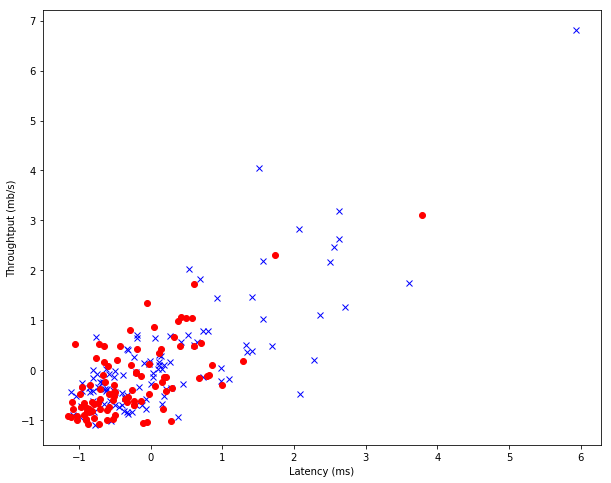

In [14]:
plot_points(normalize_features,y)

<font color='#17a856'>**_Train and Test_**<font/>

In [15]:
X, Y = shuffle(X,Y,random_state= 1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

In [16]:
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(165, 59) (165, 2)
(42, 59) (42, 2)


<font color='#17a856'>**_Define Parameters and Hyper Parameters_**<font/>

In [ ]:
# Hyper Parameters
learning_rate =0.1
training_epochs = 1000

In [ ]:
# store cost history
cost_history = np.empty(shape=[1],dtype=float)

In [ ]:
n_dim = X.shape[1]
n_class = 2               

In [17]:
n_dim

In [21]:
W = tf.Variable(tf.zeros([n_dim, n_class]),name='Weight') # 59*2 shape matrix
b = tf.Variable(tf.zeros([n_class]),name='Bais') # 2 dim matrix

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
# intialize the variables
init = tf.global_variables_initializer()

<font color='#17a856'>**_Define Cost Function For Single Layer Model_**<font/>

In [23]:
x = tf.placeholder(tf.float32, [None, n_dim])
y_ = tf.placeholder(tf.float32,[None,n_class])
# A Model
y = tf.nn.softmax(tf.matmul(x,W) + b) 
# Cost
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)),reduction_indices = [1]))
# optimize Cost Used Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
# Minize the cost
training_step = optimizer.minimize(cost_function)

Instructions for updating:
Use tf.cast instead.


<font color='#17a856'>**_Calculate the cost for each epochs_**<font/>

In [45]:
saver = tf.train.Saver() # Saving the tensorflow model

In [46]:
# initialize the Session
sess = tf.Session()
sess.run(init)

In [47]:
# Single layer model
mse_history_test = []
mse_history_train = []
for epoch in range(training_epochs):
    
    sess.run(training_step, feed_dict={x:train_x, y_:train_y})
    
    cost = sess.run(cost_function, feed_dict={x:train_x, y_:train_y})
    
    cost_history = np.append(cost_history,cost)
    
    pred_y_train = sess.run(y, feed_dict={x:train_x})
    
    pred_y_test = sess.run(y, feed_dict={x:test_x})
        
    print("epoch : ",epoch, ' - ', 'cost',cost)
    
    mse_train = tf.reduce_mean(tf.square(pred_y_train - train_y))
    mse_history_train.append(sess.run(mse_train))
    
    mse_test = tf.reduce_mean(tf.square(pred_y_test - test_y))
    mse_history_test.append(sess.run(mse_test))
    
#     saver.save(sess, "./checkpoints/session")

epoch :  0  -  cost 0.68688023
epoch :  1  -  cost 0.6835949
epoch :  2  -  cost 0.68125176
epoch :  3  -  cost 0.6792261
epoch :  4  -  cost 0.6773249
epoch :  5  -  cost 0.67548716
epoch :  6  -  cost 0.6736932
epoch :  7  -  cost 0.67193574
epoch :  8  -  cost 0.6702119
epoch :  9  -  cost 0.66851985
epoch :  10  -  cost 0.6668585
epoch :  11  -  cost 0.6652264
epoch :  12  -  cost 0.6636226
epoch :  13  -  cost 0.6620464
epoch :  14  -  cost 0.66049635
epoch :  15  -  cost 0.6589719
epoch :  16  -  cost 0.65747195
epoch :  17  -  cost 0.65599597
epoch :  18  -  cost 0.654543
epoch :  19  -  cost 0.6531122
epoch :  20  -  cost 0.65170306
epoch :  21  -  cost 0.65031475
epoch :  22  -  cost 0.6489467
epoch :  23  -  cost 0.6475983
epoch :  24  -  cost 0.6462688
epoch :  25  -  cost 0.64495784
epoch :  26  -  cost 0.6436648
epoch :  27  -  cost 0.64238894
epoch :  28  -  cost 0.6411302
epoch :  29  -  cost 0.63988775
epoch :  30  -  cost 0.63866127
epoch :  31  -  cost 0.6374502
epoch

epoch :  258  -  cost 0.5130788
epoch :  259  -  cost 0.51281863
epoch :  260  -  cost 0.5125596
epoch :  261  -  cost 0.51230174
epoch :  262  -  cost 0.51204497
epoch :  263  -  cost 0.5117894
epoch :  264  -  cost 0.5115348
epoch :  265  -  cost 0.5112815
epoch :  266  -  cost 0.51102924
epoch :  267  -  cost 0.51077807
epoch :  268  -  cost 0.510528
epoch :  269  -  cost 0.5102791
epoch :  270  -  cost 0.5100313
epoch :  271  -  cost 0.50978446
epoch :  272  -  cost 0.50953865
epoch :  273  -  cost 0.5092939
epoch :  274  -  cost 0.50905037
epoch :  275  -  cost 0.5088077
epoch :  276  -  cost 0.5085662
epoch :  277  -  cost 0.50832564
epoch :  278  -  cost 0.50808614
epoch :  279  -  cost 0.50784767
epoch :  280  -  cost 0.5076102
epoch :  281  -  cost 0.5073737
epoch :  282  -  cost 0.5071382
epoch :  283  -  cost 0.5069037
epoch :  284  -  cost 0.50667024
epoch :  285  -  cost 0.5064377
epoch :  286  -  cost 0.5062061
epoch :  287  -  cost 0.5059755
epoch :  288  -  cost 0.50574

epoch :  509  -  cost 0.4705797
epoch :  510  -  cost 0.4704676
epoch :  511  -  cost 0.47035572
epoch :  512  -  cost 0.47024417
epoch :  513  -  cost 0.47013286
epoch :  514  -  cost 0.47002184
epoch :  515  -  cost 0.4699111
epoch :  516  -  cost 0.46980065
epoch :  517  -  cost 0.4696905
epoch :  518  -  cost 0.46958053
epoch :  519  -  cost 0.46947092
epoch :  520  -  cost 0.46936154
epoch :  521  -  cost 0.46925247
epoch :  522  -  cost 0.46914363
epoch :  523  -  cost 0.46903512
epoch :  524  -  cost 0.46892673
epoch :  525  -  cost 0.46881875
epoch :  526  -  cost 0.46871102
epoch :  527  -  cost 0.46860346
epoch :  528  -  cost 0.4684963
epoch :  529  -  cost 0.4683893
epoch :  530  -  cost 0.46828252
epoch :  531  -  cost 0.46817613
epoch :  532  -  cost 0.46806988
epoch :  533  -  cost 0.467964
epoch :  534  -  cost 0.46785834
epoch :  535  -  cost 0.46775287
epoch :  536  -  cost 0.46764767
epoch :  537  -  cost 0.46754286
epoch :  538  -  cost 0.46743807
epoch :  539  -  c

epoch :  761  -  cost 0.44886687
epoch :  762  -  cost 0.4487999
epoch :  763  -  cost 0.448733
epoch :  764  -  cost 0.44866624
epoch :  765  -  cost 0.44859967
epoch :  766  -  cost 0.44853318
epoch :  767  -  cost 0.4484667
epoch :  768  -  cost 0.44840038
epoch :  769  -  cost 0.44833416
epoch :  770  -  cost 0.44826803
epoch :  771  -  cost 0.44820204
epoch :  772  -  cost 0.4481362
epoch :  773  -  cost 0.44807047
epoch :  774  -  cost 0.44800475
epoch :  775  -  cost 0.44793922
epoch :  776  -  cost 0.4478738
epoch :  777  -  cost 0.44780847
epoch :  778  -  cost 0.44774324
epoch :  779  -  cost 0.44767812
epoch :  780  -  cost 0.44761312
epoch :  781  -  cost 0.44754815
epoch :  782  -  cost 0.44748336
epoch :  783  -  cost 0.44741863
epoch :  784  -  cost 0.44735408
epoch :  785  -  cost 0.4472896
epoch :  786  -  cost 0.44722512
epoch :  787  -  cost 0.44716084
epoch :  788  -  cost 0.44709668
epoch :  789  -  cost 0.44703257
epoch :  790  -  cost 0.44696864
epoch :  791  -  

In [54]:
# tf.reset_default_graph()
# saver = tf.train.import_meta_graph('./checkpoints/session.meta') 

In [28]:
# # restore checkpoints
# with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint("./checkpoints/"))
#     sess.run(tf.global_variables_initializer())

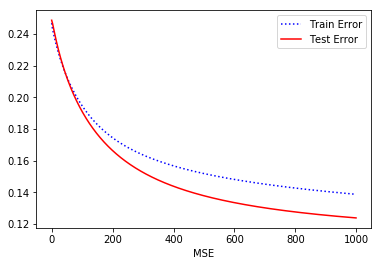

In [53]:
#print("MSE:", mse_history)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(range(len(mse_history_train)),mse_history_train,'b:',label='Train Error')
plt.plot(range(len(mse_history_test)),mse_history_test,'r-', label='Test Error')
plt.xlabel("MSE")
plt.legend(loc='upper right')
plt.show()

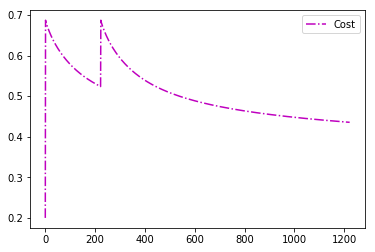

In [51]:
plt.plot(range(len(cost_history)),cost_history,'m-.', label='Cost')
plt.legend(loc='upper right')

In [52]:
tf.trainable_variables()

[<tf.Variable 'Weight:0' shape=(59, 2) dtype=float32_ref>,
 <tf.Variable 'Bais:0' shape=(2,) dtype=float32_ref>]

In [39]:
print(sess.run(b))

[-0.15254998  0.15255   ]


<font color='#17a856'>**_Define Cost Function For Multi Layer Model_**<font/>

<font color='#17a856'>_Define Parameters and Hyper Parameters_<font/>

In [37]:
learning_rate =0.1
training_epochs = 3000
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
n_class = 2        

In [38]:
#define the number of hidden layer and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [39]:
x = tf.placeholder(tf.float32, [None, n_dim])
y_ = tf.placeholder(tf.float32, [None, n_class])

In [40]:
weights = {
    "h1" : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    "h2" : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    "h3" : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    "h4" : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    "out" : tf.Variable(tf.truncated_normal([n_hidden_4, n_class])),
}

biases = {
    "b1" : tf.Variable(tf.truncated_normal([n_hidden_1])),
    "b2" : tf.Variable(tf.truncated_normal([n_hidden_2])),
    "b3" : tf.Variable(tf.truncated_normal([n_hidden_3])),
    "b4" : tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_class]))
}

In [41]:
def multilayer_perceptron(x, weights, biases):
    
    # Hidden layer with sigmoid activation
    layer_1 = tf.add( tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden layer with sigmoid activation
    layer_2 = tf.add( tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Hidden layer with sigmoid activation
    layer_3 = tf.add( tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    # Hidden layer with sigmoid activation
    layer_4 = tf.add( tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    
    return out_layer

In [42]:
init = tf.global_variables_initializer()

In [43]:
# Call model
y = multilayer_perceptron(x=x, weights = weights, biases = biases)

# Cost
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))

# optimize Cost Used Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

# Minize the cost
training_step = optimizer.minimize(cost_function)

In [44]:
# initialize the Session
sess = tf.Session()
sess.run(init)

<font color='#17a856'>**_Calculate the cost for each epochs_**<font/>

In [45]:
# Multilayer Perceptron
mse_history = []

accuracy_history = []

for epoch in range(training_epochs):
    
    sess.run(training_step, feed_dict={x:train_x, y_:train_y})
    
    cost = sess.run(cost_function, feed_dict={x:train_x, y_:train_y})
    
    cost_history = np.append(cost_history, cost)
    
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # print("Accuracy:", (sess.run(accuracy,feed_dict={x:test_x,y_:test_y})))
    pred_y = sess.run(y, feed_dict = {x:test_x})
    
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    
    mse_ = sess.run(mse)
    
    mse_history.append(mse_)
    
    accuracy = (sess.run(accuracy, feed_dict={x:test_x, y_:test_y}))
    
    accuracy_history.append(accuracy)
    
    print("epoch : ", epoch, ' - ', 'cost', cost, '-MSE:', mse_, "-Accuracy: ", accuracy)
    

epoch :  0  -  cost 55.845577 -MSE: 4015.4943025995362 -Accuracy:  0.5
epoch :  1  -  cost 1.2718812 -MSE: 20.229990774717983 -Accuracy:  0.5952381
epoch :  2  -  cost 19.423876 -MSE: 512.2801220658162 -Accuracy:  0.5
epoch :  3  -  cost 18.179123 -MSE: 277.5414018719276 -Accuracy:  0.5
epoch :  4  -  cost 17.795292 -MSE: 409.4126647605052 -Accuracy:  0.5
epoch :  5  -  cost 5.673642 -MSE: 30.822684261045975 -Accuracy:  0.5
epoch :  6  -  cost 15.4866 -MSE: 308.1030663502523 -Accuracy:  0.5
epoch :  7  -  cost 1.080066 -MSE: 9.248960172944525 -Accuracy:  0.5
epoch :  8  -  cost 7.675266 -MSE: 68.94960462940759 -Accuracy:  0.5
epoch :  9  -  cost 4.374133 -MSE: 28.674750360036484 -Accuracy:  0.5
epoch :  10  -  cost 3.2148564 -MSE: 25.959464746263393 -Accuracy:  0.5
epoch :  11  -  cost 4.2597594 -MSE: 26.525408522955132 -Accuracy:  0.5
epoch :  12  -  cost 1.193805 -MSE: 12.675410694879387 -Accuracy:  0.5
epoch :  13  -  cost 2.7898543 -MSE: 13.798649622293334 -Accuracy:  0.5
epoch :  

epoch :  107  -  cost 0.47580266 -MSE: 3.8624381863583594 -Accuracy:  0.7619048
epoch :  108  -  cost 0.45672953 -MSE: 5.043930839433307 -Accuracy:  0.64285713
epoch :  109  -  cost 0.46779457 -MSE: 3.910901524965846 -Accuracy:  0.7619048
epoch :  110  -  cost 0.44990882 -MSE: 5.014585789532922 -Accuracy:  0.64285713
epoch :  111  -  cost 0.4631381 -MSE: 3.895225533390211 -Accuracy:  0.78571427
epoch :  112  -  cost 0.4494047 -MSE: 5.065336338287646 -Accuracy:  0.64285713
epoch :  113  -  cost 0.463434 -MSE: 3.949992049845337 -Accuracy:  0.78571427
epoch :  114  -  cost 0.45233414 -MSE: 5.114790747672959 -Accuracy:  0.64285713
epoch :  115  -  cost 0.47151905 -MSE: 3.9293065387261072 -Accuracy:  0.7619048
epoch :  116  -  cost 0.45611647 -MSE: 5.141745875410692 -Accuracy:  0.64285713
epoch :  117  -  cost 0.4752925 -MSE: 3.945588528124547 -Accuracy:  0.7380952
epoch :  118  -  cost 0.45956695 -MSE: 5.19319038153173 -Accuracy:  0.64285713
epoch :  119  -  cost 0.48038983 -MSE: 3.9333424

epoch :  211  -  cost 0.3806823 -MSE: 4.17804310841243 -Accuracy:  0.8095238
epoch :  212  -  cost 0.36144328 -MSE: 5.382767405894292 -Accuracy:  0.7380952
epoch :  213  -  cost 0.39091673 -MSE: 4.22374265532809 -Accuracy:  0.8095238
epoch :  214  -  cost 0.36353046 -MSE: 5.410777218669798 -Accuracy:  0.7380952
epoch :  215  -  cost 0.3781241 -MSE: 4.287480540154738 -Accuracy:  0.8095238
epoch :  216  -  cost 0.3508683 -MSE: 5.32978387164561 -Accuracy:  0.71428573
epoch :  217  -  cost 0.37788263 -MSE: 4.19750480835759 -Accuracy:  0.8095238
epoch :  218  -  cost 0.3483385 -MSE: 5.336041063357895 -Accuracy:  0.71428573
epoch :  219  -  cost 0.36654526 -MSE: 4.254065927967777 -Accuracy:  0.8095238
epoch :  220  -  cost 0.3394054 -MSE: 5.3143276191009825 -Accuracy:  0.71428573
epoch :  221  -  cost 0.3543076 -MSE: 4.2745179202579235 -Accuracy:  0.8095238
epoch :  222  -  cost 0.3297531 -MSE: 5.250770675999057 -Accuracy:  0.71428573
epoch :  223  -  cost 0.3485438 -MSE: 4.268994562367928 -

epoch :  315  -  cost 0.4054635 -MSE: 4.852574617943031 -Accuracy:  0.71428573
epoch :  316  -  cost 0.3119744 -MSE: 6.634797049157623 -Accuracy:  0.6666667
epoch :  317  -  cost 0.30930945 -MSE: 4.855956877393368 -Accuracy:  0.8333333
epoch :  318  -  cost 0.24916127 -MSE: 6.166499731860602 -Accuracy:  0.7380952
epoch :  319  -  cost 0.23536201 -MSE: 5.109478080529557 -Accuracy:  0.88095236
epoch :  320  -  cost 0.21473928 -MSE: 5.900726467786852 -Accuracy:  0.7380952
epoch :  321  -  cost 0.20990832 -MSE: 5.396700126535056 -Accuracy:  0.88095236
epoch :  322  -  cost 0.20410328 -MSE: 5.976137098666191 -Accuracy:  0.78571427
epoch :  323  -  cost 0.20058173 -MSE: 5.621026004105531 -Accuracy:  0.8333333
epoch :  324  -  cost 0.19821694 -MSE: 6.058807315880092 -Accuracy:  0.78571427
epoch :  325  -  cost 0.19647446 -MSE: 5.741636514780287 -Accuracy:  0.8333333
epoch :  326  -  cost 0.19445056 -MSE: 6.102041562782231 -Accuracy:  0.8095238
epoch :  327  -  cost 0.19394612 -MSE: 5.79842127

epoch :  419  -  cost 0.1503012 -MSE: 6.945229299160316 -Accuracy:  0.8333333
epoch :  420  -  cost 0.15254651 -MSE: 7.753726398610205 -Accuracy:  0.7619048
epoch :  421  -  cost 0.16115877 -MSE: 6.678119244880913 -Accuracy:  0.88095236
epoch :  422  -  cost 0.15964663 -MSE: 7.871489703832708 -Accuracy:  0.7619048
epoch :  423  -  cost 0.17889363 -MSE: 6.392031263817056 -Accuracy:  0.88095236
epoch :  424  -  cost 0.17613693 -MSE: 8.137093912686542 -Accuracy:  0.7619048
epoch :  425  -  cost 0.21189754 -MSE: 6.18850702904174 -Accuracy:  0.85714287
epoch :  426  -  cost 0.2022466 -MSE: 8.428095523840712 -Accuracy:  0.7380952
epoch :  427  -  cost 0.24539307 -MSE: 6.1781800208952244 -Accuracy:  0.85714287
epoch :  428  -  cost 0.22505449 -MSE: 8.583435682395706 -Accuracy:  0.7380952
epoch :  429  -  cost 0.26666218 -MSE: 6.118832704456671 -Accuracy:  0.8333333
epoch :  430  -  cost 0.23011483 -MSE: 8.540387323517791 -Accuracy:  0.7380952
epoch :  431  -  cost 0.26549947 -MSE: 6.036519852

epoch :  523  -  cost 0.1566417 -MSE: 7.539972647637195 -Accuracy:  0.85714287
epoch :  524  -  cost 0.15047559 -MSE: 10.05288244230521 -Accuracy:  0.7619048
epoch :  525  -  cost 0.18594521 -MSE: 7.302088220780915 -Accuracy:  0.8333333
epoch :  526  -  cost 0.18798041 -MSE: 10.499072730004597 -Accuracy:  0.7380952
epoch :  527  -  cost 0.2501398 -MSE: 6.967882092689693 -Accuracy:  0.8095238
epoch :  528  -  cost 0.2326247 -MSE: 10.73127421517449 -Accuracy:  0.7380952
epoch :  529  -  cost 0.2951938 -MSE: 7.036447973094808 -Accuracy:  0.71428573
epoch :  530  -  cost 0.2744345 -MSE: 10.93507749242037 -Accuracy:  0.71428573
epoch :  531  -  cost 0.3594648 -MSE: 6.711758227183176 -Accuracy:  0.71428573
epoch :  532  -  cost 0.29053503 -MSE: 10.808326805948095 -Accuracy:  0.71428573
epoch :  533  -  cost 0.31344116 -MSE: 6.791003370171079 -Accuracy:  0.71428573
epoch :  534  -  cost 0.23456518 -MSE: 10.396958599149436 -Accuracy:  0.7380952
epoch :  535  -  cost 0.23149906 -MSE: 6.59127816

epoch :  627  -  cost 0.08401568 -MSE: 10.272007772354433 -Accuracy:  0.8095238
epoch :  628  -  cost 0.082118146 -MSE: 11.918650262236152 -Accuracy:  0.7380952
epoch :  629  -  cost 0.085955314 -MSE: 10.203094346216776 -Accuracy:  0.8333333
epoch :  630  -  cost 0.0836609 -MSE: 12.06633392611834 -Accuracy:  0.7380952
epoch :  631  -  cost 0.08854219 -MSE: 10.163997994188607 -Accuracy:  0.8333333
epoch :  632  -  cost 0.08745988 -MSE: 12.257203074473043 -Accuracy:  0.7380952
epoch :  633  -  cost 0.09317456 -MSE: 10.143350957632482 -Accuracy:  0.8333333
epoch :  634  -  cost 0.09150197 -MSE: 12.373989585633078 -Accuracy:  0.7380952
epoch :  635  -  cost 0.101534165 -MSE: 9.997955580308181 -Accuracy:  0.8095238
epoch :  636  -  cost 0.09978888 -MSE: 12.59217125087528 -Accuracy:  0.7380952
epoch :  637  -  cost 0.11301168 -MSE: 9.90556615142831 -Accuracy:  0.8333333
epoch :  638  -  cost 0.114078626 -MSE: 12.872373545908623 -Accuracy:  0.7380952
epoch :  639  -  cost 0.13845564 -MSE: 9.5

epoch :  730  -  cost 0.050854933 -MSE: 13.320937046799774 -Accuracy:  0.8095238
epoch :  731  -  cost 0.051363744 -MSE: 12.600564568940163 -Accuracy:  0.8333333
epoch :  732  -  cost 0.0508076 -MSE: 13.385468322804693 -Accuracy:  0.8095238
epoch :  733  -  cost 0.050965056 -MSE: 12.705988744045282 -Accuracy:  0.8333333
epoch :  734  -  cost 0.0504243 -MSE: 13.374944479798723 -Accuracy:  0.8095238
epoch :  735  -  cost 0.05058228 -MSE: 12.726905175013101 -Accuracy:  0.8333333
epoch :  736  -  cost 0.049941506 -MSE: 13.412844952270483 -Accuracy:  0.8095238
epoch :  737  -  cost 0.04968089 -MSE: 12.839440902416195 -Accuracy:  0.8333333
epoch :  738  -  cost 0.049053326 -MSE: 13.385256942688692 -Accuracy:  0.8095238
epoch :  739  -  cost 0.04872478 -MSE: 12.94426281972108 -Accuracy:  0.8333333
epoch :  740  -  cost 0.048541468 -MSE: 13.396207723167644 -Accuracy:  0.8095238
epoch :  741  -  cost 0.048305534 -MSE: 12.949759828801229 -Accuracy:  0.8333333
epoch :  742  -  cost 0.048199452 -M

epoch :  832  -  cost 0.035264112 -MSE: 14.897514386405621 -Accuracy:  0.78571427
epoch :  833  -  cost 0.03525234 -MSE: 14.762628124545065 -Accuracy:  0.78571427
epoch :  834  -  cost 0.035115764 -MSE: 15.022333255129698 -Accuracy:  0.78571427
epoch :  835  -  cost 0.034936633 -MSE: 14.815997519798064 -Accuracy:  0.78571427
epoch :  836  -  cost 0.03480409 -MSE: 14.994071545592941 -Accuracy:  0.78571427
epoch :  837  -  cost 0.03468019 -MSE: 14.873404002608911 -Accuracy:  0.78571427
epoch :  838  -  cost 0.034621026 -MSE: 14.960500313306625 -Accuracy:  0.78571427
epoch :  839  -  cost 0.034351476 -MSE: 14.96291758276554 -Accuracy:  0.78571427
epoch :  840  -  cost 0.03421645 -MSE: 14.992448373234051 -Accuracy:  0.78571427
epoch :  841  -  cost 0.034127325 -MSE: 15.085209331890223 -Accuracy:  0.78571427
epoch :  842  -  cost 0.03399088 -MSE: 15.042922689256638 -Accuracy:  0.78571427
epoch :  843  -  cost 0.033952877 -MSE: 15.028400648581382 -Accuracy:  0.78571427
epoch :  844  -  cost 

epoch :  933  -  cost 0.025449054 -MSE: 16.191459702323968 -Accuracy:  0.78571427
epoch :  934  -  cost 0.025473155 -MSE: 16.391572974795743 -Accuracy:  0.78571427
epoch :  935  -  cost 0.025433827 -MSE: 16.16017701207201 -Accuracy:  0.78571427
epoch :  936  -  cost 0.025487369 -MSE: 16.522406591141777 -Accuracy:  0.8095238
epoch :  937  -  cost 0.02539028 -MSE: 16.14117942848971 -Accuracy:  0.78571427
epoch :  938  -  cost 0.025322255 -MSE: 16.517887402672468 -Accuracy:  0.8095238
epoch :  939  -  cost 0.025225276 -MSE: 16.1516904879745 -Accuracy:  0.78571427
epoch :  940  -  cost 0.025160238 -MSE: 16.553952235890534 -Accuracy:  0.8095238
epoch :  941  -  cost 0.025034916 -MSE: 16.220897960132252 -Accuracy:  0.78571427
epoch :  942  -  cost 0.024947722 -MSE: 16.52116599582583 -Accuracy:  0.8095238
epoch :  943  -  cost 0.024847884 -MSE: 16.233553264753766 -Accuracy:  0.78571427
epoch :  944  -  cost 0.024676366 -MSE: 16.528015932913497 -Accuracy:  0.78571427
epoch :  945  -  cost 0.02

epoch :  1034  -  cost 0.019315986 -MSE: 17.611048449143976 -Accuracy:  0.8095238
epoch :  1035  -  cost 0.019340243 -MSE: 17.36835755064225 -Accuracy:  0.78571427
epoch :  1036  -  cost 0.019268597 -MSE: 17.639247449041267 -Accuracy:  0.8095238
epoch :  1037  -  cost 0.019249802 -MSE: 17.385047863239635 -Accuracy:  0.78571427
epoch :  1038  -  cost 0.019169543 -MSE: 17.68674791776197 -Accuracy:  0.8095238
epoch :  1039  -  cost 0.019178377 -MSE: 17.404837506678888 -Accuracy:  0.78571427
epoch :  1040  -  cost 0.019081306 -MSE: 17.679058860366684 -Accuracy:  0.8095238
epoch :  1041  -  cost 0.019022087 -MSE: 17.471011715029974 -Accuracy:  0.78571427
epoch :  1042  -  cost 0.018928705 -MSE: 17.67172435937543 -Accuracy:  0.8095238
epoch :  1043  -  cost 0.018855926 -MSE: 17.57207577024845 -Accuracy:  0.8095238
epoch :  1044  -  cost 0.018801099 -MSE: 17.67157300284801 -Accuracy:  0.8095238
epoch :  1045  -  cost 0.01875069 -MSE: 17.60098500723065 -Accuracy:  0.8095238
epoch :  1046  -  c

epoch :  1135  -  cost 0.015352006 -MSE: 18.579779053220204 -Accuracy:  0.8095238
epoch :  1136  -  cost 0.015284449 -MSE: 18.763168472374847 -Accuracy:  0.8095238
epoch :  1137  -  cost 0.015231106 -MSE: 18.681517911455618 -Accuracy:  0.8095238
epoch :  1138  -  cost 0.015223031 -MSE: 18.780312522009915 -Accuracy:  0.8095238
epoch :  1139  -  cost 0.015189633 -MSE: 18.682539778349287 -Accuracy:  0.8095238
epoch :  1140  -  cost 0.0151400035 -MSE: 18.83053463653592 -Accuracy:  0.8095238
epoch :  1141  -  cost 0.0151407095 -MSE: 18.69803153614988 -Accuracy:  0.8095238
epoch :  1142  -  cost 0.015071279 -MSE: 18.845375051673585 -Accuracy:  0.8095238
epoch :  1143  -  cost 0.015040304 -MSE: 18.75736183594726 -Accuracy:  0.8095238
epoch :  1144  -  cost 0.015022408 -MSE: 18.858786744490097 -Accuracy:  0.8095238
epoch :  1145  -  cost 0.015026299 -MSE: 18.711861606877456 -Accuracy:  0.8095238
epoch :  1146  -  cost 0.014994808 -MSE: 18.928101527241868 -Accuracy:  0.8095238
epoch :  1147  - 

epoch :  1236  -  cost 0.012516422 -MSE: 19.877602724943227 -Accuracy:  0.8095238
epoch :  1237  -  cost 0.012483628 -MSE: 19.82064382541093 -Accuracy:  0.8095238
epoch :  1238  -  cost 0.012479159 -MSE: 19.846919558318284 -Accuracy:  0.8095238
epoch :  1239  -  cost 0.012437267 -MSE: 19.885887175617444 -Accuracy:  0.8095238
epoch :  1240  -  cost 0.012406815 -MSE: 19.870201085854557 -Accuracy:  0.8095238
epoch :  1241  -  cost 0.012385476 -MSE: 19.88070308716105 -Accuracy:  0.8095238
epoch :  1242  -  cost 0.012386186 -MSE: 19.888449287540745 -Accuracy:  0.8095238
epoch :  1243  -  cost 0.012339463 -MSE: 19.903550284372987 -Accuracy:  0.8095238
epoch :  1244  -  cost 0.012317616 -MSE: 19.914875434661738 -Accuracy:  0.8095238
epoch :  1245  -  cost 0.012301482 -MSE: 19.95693172408412 -Accuracy:  0.8095238
epoch :  1246  -  cost 0.0122972485 -MSE: 19.881647255140695 -Accuracy:  0.8095238
epoch :  1247  -  cost 0.012254993 -MSE: 20.016574965102286 -Accuracy:  0.8095238
epoch :  1248  -  

epoch :  1337  -  cost 0.010446333 -MSE: 21.006491876255957 -Accuracy:  0.8095238
epoch :  1338  -  cost 0.010423402 -MSE: 20.90014869791976 -Accuracy:  0.8095238
epoch :  1339  -  cost 0.0104257995 -MSE: 21.028699572915492 -Accuracy:  0.8095238
epoch :  1340  -  cost 0.010404388 -MSE: 20.895022715312805 -Accuracy:  0.8095238
epoch :  1341  -  cost 0.010372907 -MSE: 21.05127241236523 -Accuracy:  0.8095238
epoch :  1342  -  cost 0.01036835 -MSE: 20.934539960254636 -Accuracy:  0.8095238
epoch :  1343  -  cost 0.0103400145 -MSE: 21.077846497606878 -Accuracy:  0.8095238
epoch :  1344  -  cost 0.010314983 -MSE: 20.989888285371272 -Accuracy:  0.8095238
epoch :  1345  -  cost 0.01031091 -MSE: 21.01729013765791 -Accuracy:  0.8095238
epoch :  1346  -  cost 0.010275345 -MSE: 21.05819406420196 -Accuracy:  0.8095238
epoch :  1347  -  cost 0.01026497 -MSE: 21.056423813918606 -Accuracy:  0.8095238
epoch :  1348  -  cost 0.010253336 -MSE: 21.035390031379464 -Accuracy:  0.8095238
epoch :  1349  -  cos

epoch :  1438  -  cost 0.008877018 -MSE: 21.90020920054451 -Accuracy:  0.8095238
epoch :  1439  -  cost 0.008872147 -MSE: 21.9616274066775 -Accuracy:  0.8095238
epoch :  1440  -  cost 0.008849933 -MSE: 21.958244290025537 -Accuracy:  0.8095238
epoch :  1441  -  cost 0.008840332 -MSE: 21.9635823627898 -Accuracy:  0.8095238
epoch :  1442  -  cost 0.008838049 -MSE: 21.904041296040372 -Accuracy:  0.8095238
epoch :  1443  -  cost 0.008822446 -MSE: 22.043950389483626 -Accuracy:  0.8095238
epoch :  1444  -  cost 0.0087991925 -MSE: 21.93767299977438 -Accuracy:  0.8095238
epoch :  1445  -  cost 0.008788579 -MSE: 21.986862943128205 -Accuracy:  0.8095238
epoch :  1446  -  cost 0.00877961 -MSE: 21.955841833578226 -Accuracy:  0.8095238
epoch :  1447  -  cost 0.008768172 -MSE: 22.071740768251484 -Accuracy:  0.8095238
epoch :  1448  -  cost 0.008766636 -MSE: 21.942397830906007 -Accuracy:  0.8095238
epoch :  1449  -  cost 0.008747701 -MSE: 22.093597139773415 -Accuracy:  0.8095238
epoch :  1450  -  cost

epoch :  1539  -  cost 0.007698939 -MSE: 22.71175830167818 -Accuracy:  0.8095238
epoch :  1540  -  cost 0.007680002 -MSE: 22.88744144882056 -Accuracy:  0.8095238
epoch :  1541  -  cost 0.007657705 -MSE: 22.763926253291505 -Accuracy:  0.8095238
epoch :  1542  -  cost 0.0076567577 -MSE: 22.873740019338147 -Accuracy:  0.8095238
epoch :  1543  -  cost 0.007635892 -MSE: 22.788967175000565 -Accuracy:  0.8095238
epoch :  1544  -  cost 0.007628206 -MSE: 22.880958558625643 -Accuracy:  0.8095238
epoch :  1545  -  cost 0.0076229847 -MSE: 22.782331878877773 -Accuracy:  0.8095238
epoch :  1546  -  cost 0.007603335 -MSE: 22.906782250629572 -Accuracy:  0.8095238
epoch :  1547  -  cost 0.0076013217 -MSE: 22.81230361795089 -Accuracy:  0.8095238
epoch :  1548  -  cost 0.0075796684 -MSE: 22.886013764158385 -Accuracy:  0.8095238
epoch :  1549  -  cost 0.0075711706 -MSE: 22.86116141849666 -Accuracy:  0.8095238
epoch :  1550  -  cost 0.007566917 -MSE: 22.863834976346297 -Accuracy:  0.8095238
epoch :  1551  

epoch :  1639  -  cost 0.0067396765 -MSE: 23.653995311027984 -Accuracy:  0.8095238
epoch :  1640  -  cost 0.0067446576 -MSE: 23.533143811936515 -Accuracy:  0.8095238
epoch :  1641  -  cost 0.006725412 -MSE: 23.67772244294924 -Accuracy:  0.8095238
epoch :  1642  -  cost 0.0067235455 -MSE: 23.553211572211044 -Accuracy:  0.8095238
epoch :  1643  -  cost 0.0067126923 -MSE: 23.672511946191246 -Accuracy:  0.8095238
epoch :  1644  -  cost 0.006701617 -MSE: 23.58534116785888 -Accuracy:  0.8095238
epoch :  1645  -  cost 0.00670359 -MSE: 23.72169977231359 -Accuracy:  0.8095238
epoch :  1646  -  cost 0.0067030727 -MSE: 23.548302114519927 -Accuracy:  0.8095238
epoch :  1647  -  cost 0.0066800234 -MSE: 23.73345814125791 -Accuracy:  0.8095238
epoch :  1648  -  cost 0.0066828555 -MSE: 23.5834900659787 -Accuracy:  0.8095238
epoch :  1649  -  cost 0.0066554677 -MSE: 23.72102798652468 -Accuracy:  0.8095238
epoch :  1650  -  cost 0.0066572744 -MSE: 23.648337769912796 -Accuracy:  0.8095238
epoch :  1651  

epoch :  1739  -  cost 0.006003232 -MSE: 24.245397267837426 -Accuracy:  0.8095238
epoch :  1740  -  cost 0.0059881397 -MSE: 24.405199129762575 -Accuracy:  0.8333333
epoch :  1741  -  cost 0.0059906174 -MSE: 24.26668591225161 -Accuracy:  0.8095238
epoch :  1742  -  cost 0.0059703058 -MSE: 24.407126922869256 -Accuracy:  0.8333333
epoch :  1743  -  cost 0.0059601213 -MSE: 24.358355259447826 -Accuracy:  0.8333333
epoch :  1744  -  cost 0.0059560426 -MSE: 24.37225756008074 -Accuracy:  0.8095238
epoch :  1745  -  cost 0.0059489165 -MSE: 24.35222714656632 -Accuracy:  0.8095238
epoch :  1746  -  cost 0.005941669 -MSE: 24.378941030386372 -Accuracy:  0.8095238
epoch :  1747  -  cost 0.005939178 -MSE: 24.357607020934655 -Accuracy:  0.8095238
epoch :  1748  -  cost 0.0059241913 -MSE: 24.392738814702554 -Accuracy:  0.8095238
epoch :  1749  -  cost 0.005918273 -MSE: 24.394585006969535 -Accuracy:  0.8095238
epoch :  1750  -  cost 0.0059206993 -MSE: 24.365340777912188 -Accuracy:  0.8095238
epoch :  17

epoch :  1839  -  cost 0.005376364 -MSE: 25.040042255092537 -Accuracy:  0.8333333
epoch :  1840  -  cost 0.005377662 -MSE: 24.959917176161404 -Accuracy:  0.8333333
epoch :  1841  -  cost 0.005362876 -MSE: 25.020980296627346 -Accuracy:  0.8333333
epoch :  1842  -  cost 0.0053577754 -MSE: 24.99940936734322 -Accuracy:  0.8333333
epoch :  1843  -  cost 0.0053542457 -MSE: 25.023124266472948 -Accuracy:  0.8333333
epoch :  1844  -  cost 0.0053461767 -MSE: 25.028999286471475 -Accuracy:  0.8333333
epoch :  1845  -  cost 0.0053416193 -MSE: 25.03609010202635 -Accuracy:  0.8333333
epoch :  1846  -  cost 0.005347737 -MSE: 24.97331951422732 -Accuracy:  0.8333333
epoch :  1847  -  cost 0.0053385613 -MSE: 25.119174855570257 -Accuracy:  0.8333333
epoch :  1848  -  cost 0.0053375987 -MSE: 24.987822187102502 -Accuracy:  0.8333333
epoch :  1849  -  cost 0.0053201206 -MSE: 25.099030606782428 -Accuracy:  0.8333333
epoch :  1850  -  cost 0.0053158216 -MSE: 25.02901460082317 -Accuracy:  0.8333333
epoch :  185

epoch :  1939  -  cost 0.004862791 -MSE: 25.638690226941797 -Accuracy:  0.8333333
epoch :  1940  -  cost 0.004856755 -MSE: 25.579199028404258 -Accuracy:  0.8333333
epoch :  1941  -  cost 0.004854378 -MSE: 25.642740843592996 -Accuracy:  0.8333333
epoch :  1942  -  cost 0.0048519615 -MSE: 25.579529447456522 -Accuracy:  0.8333333
epoch :  1943  -  cost 0.004844716 -MSE: 25.662696170050737 -Accuracy:  0.8333333
epoch :  1944  -  cost 0.0048443405 -MSE: 25.58982769139204 -Accuracy:  0.8333333
epoch :  1945  -  cost 0.00483359 -MSE: 25.664377190834383 -Accuracy:  0.8333333
epoch :  1946  -  cost 0.004835629 -MSE: 25.606494057778484 -Accuracy:  0.8333333
epoch :  1947  -  cost 0.004825061 -MSE: 25.689033112481873 -Accuracy:  0.8333333
epoch :  1948  -  cost 0.0048221955 -MSE: 25.63290287162036 -Accuracy:  0.8333333
epoch :  1949  -  cost 0.0048182653 -MSE: 25.67319073360199 -Accuracy:  0.8333333
epoch :  1950  -  cost 0.0048095463 -MSE: 25.67154147988606 -Accuracy:  0.8333333
epoch :  1951  -

epoch :  2039  -  cost 0.0044280705 -MSE: 26.18319907928108 -Accuracy:  0.8333333
epoch :  2040  -  cost 0.0044246064 -MSE: 26.144702229192944 -Accuracy:  0.8333333
epoch :  2041  -  cost 0.0044220085 -MSE: 26.200108647060013 -Accuracy:  0.8333333
epoch :  2042  -  cost 0.0044226446 -MSE: 26.13839027337288 -Accuracy:  0.8333333
epoch :  2043  -  cost 0.004412631 -MSE: 26.220691837012904 -Accuracy:  0.8333333
epoch :  2044  -  cost 0.0044131414 -MSE: 26.16234764226443 -Accuracy:  0.8333333
epoch :  2045  -  cost 0.0044046743 -MSE: 26.223082858814784 -Accuracy:  0.8333333
epoch :  2046  -  cost 0.0044000275 -MSE: 26.190452858223022 -Accuracy:  0.8333333
epoch :  2047  -  cost 0.004399571 -MSE: 26.219143405606516 -Accuracy:  0.8333333
epoch :  2048  -  cost 0.004393667 -MSE: 26.200551533038638 -Accuracy:  0.8333333
epoch :  2049  -  cost 0.00439 -MSE: 26.24524264890702 -Accuracy:  0.8333333
epoch :  2050  -  cost 0.0043892865 -MSE: 26.201624960655245 -Accuracy:  0.8333333
epoch :  2051  -

epoch :  2139  -  cost 0.0040633185 -MSE: 26.76277857192095 -Accuracy:  0.8333333
epoch :  2140  -  cost 0.004062889 -MSE: 26.670359748072077 -Accuracy:  0.8333333
epoch :  2141  -  cost 0.004059501 -MSE: 26.788477682618556 -Accuracy:  0.8333333
epoch :  2142  -  cost 0.004057738 -MSE: 26.66875046966468 -Accuracy:  0.8333333
epoch :  2143  -  cost 0.0040520215 -MSE: 26.793692395420322 -Accuracy:  0.8333333
epoch :  2144  -  cost 0.0040459856 -MSE: 26.69262520885665 -Accuracy:  0.8333333
epoch :  2145  -  cost 0.00404461 -MSE: 26.78741401018869 -Accuracy:  0.8333333
epoch :  2146  -  cost 0.0040408922 -MSE: 26.70888494779918 -Accuracy:  0.8333333
epoch :  2147  -  cost 0.0040361574 -MSE: 26.79495404710272 -Accuracy:  0.8333333
epoch :  2148  -  cost 0.0040333564 -MSE: 26.72091783488893 -Accuracy:  0.8333333
epoch :  2149  -  cost 0.0040284893 -MSE: 26.80718969500756 -Accuracy:  0.8333333
epoch :  2150  -  cost 0.004028943 -MSE: 26.730638764095147 -Accuracy:  0.8333333
epoch :  2151  -  

epoch :  2239  -  cost 0.0037496018 -MSE: 27.192743538908626 -Accuracy:  0.8333333
epoch :  2240  -  cost 0.0037402676 -MSE: 27.258024615105427 -Accuracy:  0.8333333
epoch :  2241  -  cost 0.0037368124 -MSE: 27.248310375975795 -Accuracy:  0.8333333
epoch :  2242  -  cost 0.0037336147 -MSE: 27.2347394764625 -Accuracy:  0.8333333
epoch :  2243  -  cost 0.0037323663 -MSE: 27.279734449000767 -Accuracy:  0.8333333
epoch :  2244  -  cost 0.003734348 -MSE: 27.218895030261592 -Accuracy:  0.8333333
epoch :  2245  -  cost 0.0037257613 -MSE: 27.29366454654186 -Accuracy:  0.8333333
epoch :  2246  -  cost 0.0037220102 -MSE: 27.257227072001484 -Accuracy:  0.8333333
epoch :  2247  -  cost 0.0037193978 -MSE: 27.274390793133264 -Accuracy:  0.8333333
epoch :  2248  -  cost 0.003719609 -MSE: 27.25001622592662 -Accuracy:  0.8333333
epoch :  2249  -  cost 0.0037167326 -MSE: 27.328249285560883 -Accuracy:  0.8333333
epoch :  2250  -  cost 0.0037155366 -MSE: 27.252969055086933 -Accuracy:  0.8333333
epoch :  2

epoch :  2339  -  cost 0.0034669433 -MSE: 27.756536688917468 -Accuracy:  0.8333333
epoch :  2340  -  cost 0.0034653132 -MSE: 27.736187389859104 -Accuracy:  0.8333333
epoch :  2341  -  cost 0.0034622662 -MSE: 27.789144856574143 -Accuracy:  0.8333333
epoch :  2342  -  cost 0.003462356 -MSE: 27.74074425234867 -Accuracy:  0.8333333
epoch :  2343  -  cost 0.0034570391 -MSE: 27.795810759340796 -Accuracy:  0.8333333
epoch :  2344  -  cost 0.0034542098 -MSE: 27.75823421678864 -Accuracy:  0.8333333
epoch :  2345  -  cost 0.0034522628 -MSE: 27.80828009318133 -Accuracy:  0.8333333
epoch :  2346  -  cost 0.0034516205 -MSE: 27.758066208395174 -Accuracy:  0.8333333
epoch :  2347  -  cost 0.0034489443 -MSE: 27.83332513368192 -Accuracy:  0.8333333
epoch :  2348  -  cost 0.003450799 -MSE: 27.745580182661882 -Accuracy:  0.8333333
epoch :  2349  -  cost 0.0034440309 -MSE: 27.85304192337992 -Accuracy:  0.8333333
epoch :  2350  -  cost 0.0034402378 -MSE: 27.768509884282384 -Accuracy:  0.8333333
epoch :  23

epoch :  2439  -  cost 0.0032279904 -MSE: 28.19024539750163 -Accuracy:  0.8333333
epoch :  2440  -  cost 0.0032235908 -MSE: 28.27341706736077 -Accuracy:  0.8333333
epoch :  2441  -  cost 0.0032222029 -MSE: 28.21207544521116 -Accuracy:  0.8333333
epoch :  2442  -  cost 0.0032188324 -MSE: 28.285401980336804 -Accuracy:  0.8333333
epoch :  2443  -  cost 0.0032186946 -MSE: 28.224187036345274 -Accuracy:  0.8333333
epoch :  2444  -  cost 0.0032134338 -MSE: 28.282581591719495 -Accuracy:  0.8333333
epoch :  2445  -  cost 0.0032104987 -MSE: 28.256281876687915 -Accuracy:  0.8333333
epoch :  2446  -  cost 0.0032075753 -MSE: 28.26295494328476 -Accuracy:  0.8333333
epoch :  2447  -  cost 0.0032057203 -MSE: 28.2568219821435 -Accuracy:  0.8333333
epoch :  2448  -  cost 0.0032054703 -MSE: 28.26642227595844 -Accuracy:  0.8333333
epoch :  2449  -  cost 0.0032018842 -MSE: 28.296217444864446 -Accuracy:  0.8333333
epoch :  2450  -  cost 0.0032015378 -MSE: 28.268154248969875 -Accuracy:  0.8333333
epoch :  24

epoch :  2539  -  cost 0.0030100495 -MSE: 28.721847728623743 -Accuracy:  0.8333333
epoch :  2540  -  cost 0.0030071826 -MSE: 28.698459399790348 -Accuracy:  0.8333333
epoch :  2541  -  cost 0.0030058876 -MSE: 28.699352315592055 -Accuracy:  0.8333333
epoch :  2542  -  cost 0.0030055302 -MSE: 28.716642025749543 -Accuracy:  0.8333333
epoch :  2543  -  cost 0.0030011355 -MSE: 28.716255338462194 -Accuracy:  0.8333333
epoch :  2544  -  cost 0.0030012422 -MSE: 28.698256271661297 -Accuracy:  0.8333333
epoch :  2545  -  cost 0.0029998093 -MSE: 28.763596253914734 -Accuracy:  0.8333333
epoch :  2546  -  cost 0.003001034 -MSE: 28.6818742277678 -Accuracy:  0.8333333
epoch :  2547  -  cost 0.0029959597 -MSE: 28.778018330371076 -Accuracy:  0.8333333
epoch :  2548  -  cost 0.002993543 -MSE: 28.700101420961275 -Accuracy:  0.8333333
epoch :  2549  -  cost 0.0029919455 -MSE: 28.772637137255806 -Accuracy:  0.8333333
epoch :  2550  -  cost 0.0029893052 -MSE: 28.714723452515976 -Accuracy:  0.8333333
epoch : 

epoch :  2639  -  cost 0.0028212534 -MSE: 29.178217844791366 -Accuracy:  0.8333333
epoch :  2640  -  cost 0.0028218762 -MSE: 29.101079054850466 -Accuracy:  0.8333333
epoch :  2641  -  cost 0.0028168694 -MSE: 29.180597627583406 -Accuracy:  0.8333333
epoch :  2642  -  cost 0.0028160522 -MSE: 29.11616636785388 -Accuracy:  0.8333333
epoch :  2643  -  cost 0.0028157786 -MSE: 29.199695561090888 -Accuracy:  0.8333333
epoch :  2644  -  cost 0.002813459 -MSE: 29.120212028631254 -Accuracy:  0.8333333
epoch :  2645  -  cost 0.0028115998 -MSE: 29.207895713873093 -Accuracy:  0.8333333
epoch :  2646  -  cost 0.0028103977 -MSE: 29.124332578340358 -Accuracy:  0.8333333
epoch :  2647  -  cost 0.0028057017 -MSE: 29.193104603795945 -Accuracy:  0.8333333
epoch :  2648  -  cost 0.0028034307 -MSE: 29.17199163533559 -Accuracy:  0.8333333
epoch :  2649  -  cost 0.0028017832 -MSE: 29.173194034714502 -Accuracy:  0.8333333
epoch :  2650  -  cost 0.0028013207 -MSE: 29.19380312289182 -Accuracy:  0.8333333
epoch : 

epoch :  2739  -  cost 0.0026504411 -MSE: 29.579455457443167 -Accuracy:  0.8333333
epoch :  2740  -  cost 0.0026494714 -MSE: 29.550402611651364 -Accuracy:  0.8333333
epoch :  2741  -  cost 0.0026487515 -MSE: 29.617927729665535 -Accuracy:  0.8333333
epoch :  2742  -  cost 0.0026485405 -MSE: 29.544195632581786 -Accuracy:  0.8333333
epoch :  2743  -  cost 0.0026452625 -MSE: 29.630674569484604 -Accuracy:  0.8333333
epoch :  2744  -  cost 0.002644738 -MSE: 29.555996740532823 -Accuracy:  0.8333333
epoch :  2745  -  cost 0.0026411056 -MSE: 29.63430804802803 -Accuracy:  0.8333333
epoch :  2746  -  cost 0.0026399796 -MSE: 29.56794605505199 -Accuracy:  0.8333333
epoch :  2747  -  cost 0.0026382916 -MSE: 29.635102435427342 -Accuracy:  0.8333333
epoch :  2748  -  cost 0.0026381395 -MSE: 29.572365117752945 -Accuracy:  0.8333333
epoch :  2749  -  cost 0.0026344056 -MSE: 29.641584526881886 -Accuracy:  0.8333333
epoch :  2750  -  cost 0.002633795 -MSE: 29.598769435061918 -Accuracy:  0.8333333
epoch : 

epoch :  2839  -  cost 0.0024986984 -MSE: 29.977791351416315 -Accuracy:  0.8333333
epoch :  2840  -  cost 0.0024974502 -MSE: 30.03690548005222 -Accuracy:  0.8333333
epoch :  2841  -  cost 0.0024954635 -MSE: 29.970722260613144 -Accuracy:  0.8333333
epoch :  2842  -  cost 0.0024965394 -MSE: 30.051919673767586 -Accuracy:  0.8333333
epoch :  2843  -  cost 0.0024928036 -MSE: 29.979490865026253 -Accuracy:  0.8333333
epoch :  2844  -  cost 0.0024918462 -MSE: 30.04970248878474 -Accuracy:  0.8333333
epoch :  2845  -  cost 0.0024914045 -MSE: 29.977998347579632 -Accuracy:  0.8333333
epoch :  2846  -  cost 0.0024892471 -MSE: 30.063199966204486 -Accuracy:  0.8333333
epoch :  2847  -  cost 0.002488069 -MSE: 29.98901177186482 -Accuracy:  0.8333333
epoch :  2848  -  cost 0.0024848084 -MSE: 30.052593886950632 -Accuracy:  0.8333333
epoch :  2849  -  cost 0.0024830566 -MSE: 30.028057797190566 -Accuracy:  0.8333333
epoch :  2850  -  cost 0.0024808638 -MSE: 30.028655348493068 -Accuracy:  0.8333333
epoch : 

epoch :  2939  -  cost 0.0023615113 -MSE: 30.366767411530137 -Accuracy:  0.8333333
epoch :  2940  -  cost 0.002358707 -MSE: 30.42760138316025 -Accuracy:  0.8333333
epoch :  2941  -  cost 0.0023570515 -MSE: 30.384303375449583 -Accuracy:  0.8333333
epoch :  2942  -  cost 0.002356356 -MSE: 30.432501648654487 -Accuracy:  0.8333333
epoch :  2943  -  cost 0.0023556938 -MSE: 30.402157534962942 -Accuracy:  0.8333333
epoch :  2944  -  cost 0.002352483 -MSE: 30.425003245789764 -Accuracy:  0.8333333
epoch :  2945  -  cost 0.002351607 -MSE: 30.40767618670637 -Accuracy:  0.8333333
epoch :  2946  -  cost 0.0023524635 -MSE: 30.464416392068443 -Accuracy:  0.8333333
epoch :  2947  -  cost 0.0023513825 -MSE: 30.392826206920887 -Accuracy:  0.8333333
epoch :  2948  -  cost 0.0023499539 -MSE: 30.473987215146746 -Accuracy:  0.8333333
epoch :  2949  -  cost 0.0023482405 -MSE: 30.41053201518193 -Accuracy:  0.8333333
epoch :  2950  -  cost 0.002346071 -MSE: 30.473443872881187 -Accuracy:  0.8333333
epoch :  295

<font color='#17a856'>**_Mean Squared Error_**<font/>

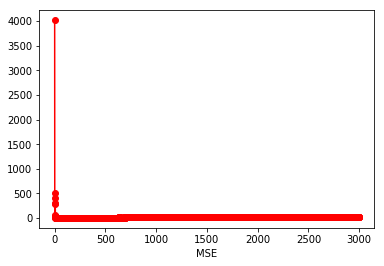

In [46]:
#print("MSE:", mse_history)
plt.plot(range(len(mse_history)),mse_history,'ro-')
plt.xlabel("MSE")
plt.show()

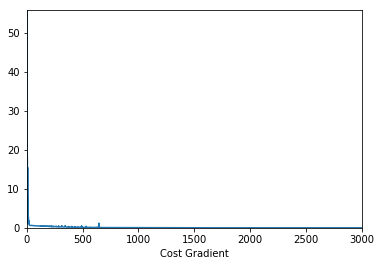

In [51]:
plt.plot(range(len(cost_history)),cost_history,'-')
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.xlabel("Cost Gradient")
plt.show()

<font color='#17a856'>**_Check The Accuracy_**<font/>

In [49]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Accuracy:", (sess.run(accuracy,feed_dict={x:test_x,y_:test_y})))

Accuracy: 0.8333333


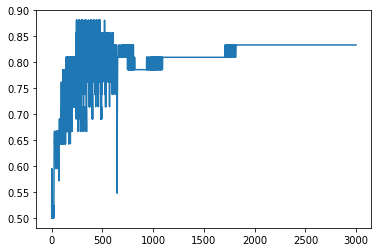

In [50]:
plt.plot(accuracy_history)

<h3 style="color:#db4e39"> Multi Layered Perceptron Example <h3/>

**Points To Remember:**
 * 1.How many Hidden layer wants to be, and how many nodes
 * 2.Learning  rate
 * 3.Number of epochs
 * 4.Output Layers
 * Also, Types of connection between layers

<h1 style="color:#bf9b69"> Convolutional Neural Network <h1/>

<font color='#443287'>
1. Color or black/white image?
2. shape of the image(bigger image has more feature information but takes more computionally expensive)
3. size of data (CPU will take lot of time to train even on 10K images, GPU is better but costly)
4. Practical adivce - set up the architecture in smaller dataset and then take it ot GPU and run
5. deep learning is very new and dynamic field with extremly active research community, research are coming up with newer model architectures frequently, Adivce to keep reading
6. Keras is great wrapper for Tensorflow and Theano
<font/>

In [11]:
# P1
# Building the CNN

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D

In [14]:
# Initialising the CNN
classifier = Sequential()

In [15]:
# I Convolution
classifier.add(Conv2D(32, (3, 3),input_shape= (64,64, 3),activation = 'relu'))

In [16]:
# 2 Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2))) # Max pooling
# classifier.add(AveragePooling2D(pool_size = (2,2))) # Average Pooling

In [17]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [18]:
# 3 Flatten
classifier.add(Flatten())

In [19]:
# 4 Full Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [20]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
path  = r'D:\Dropbox\Manish Singh _ Data\Profile Data\Video\kagglecatsanddogs_3367a\PetImages'

In [24]:
# P2
# Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

training_set = train_datagen.flow_from_directory(path, 
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_set = train_datagen.flow_from_directory(path, 
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 2048 images belonging to 2 classes.
Found 2048 images belonging to 2 classes.


In [25]:
classifier.fit_generator(training_set,
                        steps_per_epoch=8000,
                        epochs=2,
                        validation_data= test_set,
                        validation_steps= 2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
  15/8000 [..............................] - ETA: 58:32 - loss: 8.1208 - acc: 0.4854

C:\Users\manish.singh04\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\manish.singh04\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\manish.singh04\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\manish.singh04\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping t

8000/8000 [==============================] - 2314s 289ms/step - loss: 7.9630 - acc: 0.5005 - val_loss: 7.9622 - val_acc: 0.5006
Epoch 2/2
8000/8000 [==============================] - 1854s 232ms/step - loss: 7.9634 - acc: 0.5005 - val_loss: 7.9650 - val_acc: 0.5004


In [26]:
img , label=  next(test_set)

In [27]:
import numpy as np
def plots(ims,figsize=(12,6),rows=1,interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) %2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("off")
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none') 

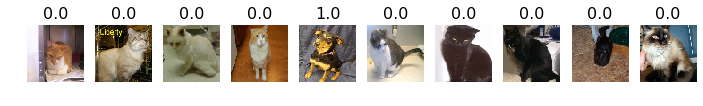

In [28]:
plots(img[:10],titles=label[:10])

In [29]:
predictions = classifier.predict_generator(test_set, steps=1,verbose=0)

In [37]:
predictions[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(label,predictions[:,0])

In [40]:
cm

array([[ 0, 19],
       [ 0, 13]], dtype=int64)

In [41]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [70]:
classifier.save("CIFAR10_edureka_training_model.h5")

In [71]:
from keras.models import load_model
model = load_model("CIFAR10_edureka_training_model.h5")

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

<h1 style="color:#9b2b4d"> Recurrent Neural Network <h1/>

<h1 style="color:#a51c25"> Kmeans Clustering using Tensorflow <h1/>

<h1 style="color:#a51c25"> Restricted Boltzman Machine <h1/>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data',validation_size = 0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


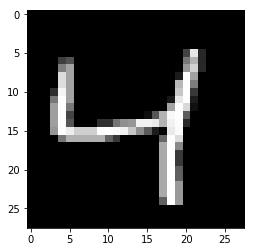

In [7]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28,28 )),cmap= 'gray')

In [8]:
image_size = mnist.train.images.shape[1]
image_size

784

In [9]:
# size of encoding layer( hidden layer)
encoding_dim= 32

In [10]:
image_size = mnist.train.images.shape[1]

In [11]:
inputs_ = tf.placeholder(tf.float32, (None, image_size),name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size),name='targets')

In [12]:
# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim,activation=tf.nn.relu)

In [13]:
encoded.shape

TensorShape([Dimension(None), Dimension(32)])

In [14]:
# Output layer logits
logits = tf.layers.dense(encoded, image_size,activation=None)
logits

<tf.Tensor 'dense_1/BiasAdd:0' shape=(?, 784) dtype=float32>

In [17]:
# Sigmoid output from
decoded =  tf.nn.sigmoid(logits, name='output')
decoded

<tf.Tensor 'output_1:0' shape=(?, 784) dtype=float32>

In [19]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

In [20]:
sess = tf.Session()

In [22]:
mnist.train.num_examples//200

300

In [25]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())

for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        
        batch = mnist.train.next_batch(batch_size)
        
        feed = {inputs_ : batch[0],targets_:batch[0]}
        
        batch_cost, _  = sess.run([cost, opt], feed_dict=feed)
        
        print("Epoch: {}/{}...".format(e+1, epochs), "Taining loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Taining loss: 0.6929
Epoch: 1/20... Taining loss: 0.6903
Epoch: 1/20... Taining loss: 0.6871
Epoch: 1/20... Taining loss: 0.6834
Epoch: 1/20... Taining loss: 0.6793
Epoch: 1/20... Taining loss: 0.6731
Epoch: 1/20... Taining loss: 0.6663
Epoch: 1/20... Taining loss: 0.6582
Epoch: 1/20... Taining loss: 0.6482
Epoch: 1/20... Taining loss: 0.6376
Epoch: 1/20... Taining loss: 0.6266
Epoch: 1/20... Taining loss: 0.6126
Epoch: 1/20... Taining loss: 0.5963
Epoch: 1/20... Taining loss: 0.5850
Epoch: 1/20... Taining loss: 0.5675
Epoch: 1/20... Taining loss: 0.5524
Epoch: 1/20... Taining loss: 0.5322
Epoch: 1/20... Taining loss: 0.5149
Epoch: 1/20... Taining loss: 0.4984
Epoch: 1/20... Taining loss: 0.4780
Epoch: 1/20... Taining loss: 0.4652
Epoch: 1/20... Taining loss: 0.4448
Epoch: 1/20... Taining loss: 0.4272
Epoch: 1/20... Taining loss: 0.4146
Epoch: 1/20... Taining loss: 0.3979
Epoch: 1/20... Taining loss: 0.3874
Epoch: 1/20... Taining loss: 0.3802
Epoch: 1/20... Taining loss:

Epoch: 1/20... Taining loss: 0.1974
Epoch: 1/20... Taining loss: 0.1893
Epoch: 1/20... Taining loss: 0.1914
Epoch: 1/20... Taining loss: 0.1920
Epoch: 1/20... Taining loss: 0.1838
Epoch: 1/20... Taining loss: 0.1941
Epoch: 1/20... Taining loss: 0.2022
Epoch: 1/20... Taining loss: 0.1993
Epoch: 1/20... Taining loss: 0.1968
Epoch: 1/20... Taining loss: 0.1957
Epoch: 1/20... Taining loss: 0.1903
Epoch: 1/20... Taining loss: 0.1986
Epoch: 1/20... Taining loss: 0.1953
Epoch: 1/20... Taining loss: 0.1910
Epoch: 1/20... Taining loss: 0.1869
Epoch: 1/20... Taining loss: 0.1901
Epoch: 1/20... Taining loss: 0.1904
Epoch: 1/20... Taining loss: 0.1879
Epoch: 1/20... Taining loss: 0.1941
Epoch: 1/20... Taining loss: 0.1956
Epoch: 1/20... Taining loss: 0.1900
Epoch: 1/20... Taining loss: 0.1902
Epoch: 1/20... Taining loss: 0.1921
Epoch: 1/20... Taining loss: 0.1834
Epoch: 1/20... Taining loss: 0.1885
Epoch: 1/20... Taining loss: 0.1887
Epoch: 1/20... Taining loss: 0.1872
Epoch: 1/20... Taining loss:

Epoch: 2/20... Taining loss: 0.1656
Epoch: 2/20... Taining loss: 0.1504
Epoch: 2/20... Taining loss: 0.1537
Epoch: 2/20... Taining loss: 0.1506
Epoch: 2/20... Taining loss: 0.1567
Epoch: 2/20... Taining loss: 0.1531
Epoch: 2/20... Taining loss: 0.1533
Epoch: 2/20... Taining loss: 0.1563
Epoch: 2/20... Taining loss: 0.1538
Epoch: 2/20... Taining loss: 0.1503
Epoch: 2/20... Taining loss: 0.1504
Epoch: 2/20... Taining loss: 0.1537
Epoch: 2/20... Taining loss: 0.1519
Epoch: 2/20... Taining loss: 0.1610
Epoch: 2/20... Taining loss: 0.1488
Epoch: 2/20... Taining loss: 0.1536
Epoch: 2/20... Taining loss: 0.1522
Epoch: 2/20... Taining loss: 0.1533
Epoch: 2/20... Taining loss: 0.1522
Epoch: 2/20... Taining loss: 0.1526
Epoch: 2/20... Taining loss: 0.1534
Epoch: 2/20... Taining loss: 0.1516
Epoch: 2/20... Taining loss: 0.1480
Epoch: 2/20... Taining loss: 0.1468
Epoch: 2/20... Taining loss: 0.1502
Epoch: 2/20... Taining loss: 0.1529
Epoch: 2/20... Taining loss: 0.1520
Epoch: 2/20... Taining loss:

Epoch: 3/20... Taining loss: 0.1285
Epoch: 3/20... Taining loss: 0.1355
Epoch: 3/20... Taining loss: 0.1310
Epoch: 3/20... Taining loss: 0.1339
Epoch: 3/20... Taining loss: 0.1353
Epoch: 3/20... Taining loss: 0.1309
Epoch: 3/20... Taining loss: 0.1330
Epoch: 3/20... Taining loss: 0.1325
Epoch: 3/20... Taining loss: 0.1332
Epoch: 3/20... Taining loss: 0.1319
Epoch: 3/20... Taining loss: 0.1306
Epoch: 3/20... Taining loss: 0.1338
Epoch: 3/20... Taining loss: 0.1285
Epoch: 3/20... Taining loss: 0.1319
Epoch: 3/20... Taining loss: 0.1307
Epoch: 3/20... Taining loss: 0.1242
Epoch: 3/20... Taining loss: 0.1318
Epoch: 3/20... Taining loss: 0.1317
Epoch: 3/20... Taining loss: 0.1365
Epoch: 3/20... Taining loss: 0.1305
Epoch: 3/20... Taining loss: 0.1308
Epoch: 3/20... Taining loss: 0.1304
Epoch: 3/20... Taining loss: 0.1274
Epoch: 3/20... Taining loss: 0.1304
Epoch: 3/20... Taining loss: 0.1284
Epoch: 3/20... Taining loss: 0.1346
Epoch: 3/20... Taining loss: 0.1302
Epoch: 3/20... Taining loss:

Epoch: 4/20... Taining loss: 0.1273
Epoch: 4/20... Taining loss: 0.1187
Epoch: 4/20... Taining loss: 0.1217
Epoch: 4/20... Taining loss: 0.1177
Epoch: 4/20... Taining loss: 0.1158
Epoch: 4/20... Taining loss: 0.1218
Epoch: 4/20... Taining loss: 0.1256
Epoch: 4/20... Taining loss: 0.1154
Epoch: 4/20... Taining loss: 0.1205
Epoch: 4/20... Taining loss: 0.1218
Epoch: 4/20... Taining loss: 0.1229
Epoch: 4/20... Taining loss: 0.1207
Epoch: 4/20... Taining loss: 0.1173
Epoch: 4/20... Taining loss: 0.1176
Epoch: 4/20... Taining loss: 0.1158
Epoch: 4/20... Taining loss: 0.1229
Epoch: 4/20... Taining loss: 0.1221
Epoch: 4/20... Taining loss: 0.1209
Epoch: 4/20... Taining loss: 0.1207
Epoch: 4/20... Taining loss: 0.1187
Epoch: 4/20... Taining loss: 0.1162
Epoch: 4/20... Taining loss: 0.1240
Epoch: 4/20... Taining loss: 0.1182
Epoch: 4/20... Taining loss: 0.1181
Epoch: 4/20... Taining loss: 0.1189
Epoch: 4/20... Taining loss: 0.1191
Epoch: 4/20... Taining loss: 0.1218
Epoch: 4/20... Taining loss:

Epoch: 5/20... Taining loss: 0.1107
Epoch: 5/20... Taining loss: 0.1160
Epoch: 5/20... Taining loss: 0.1131
Epoch: 5/20... Taining loss: 0.1150
Epoch: 5/20... Taining loss: 0.1100
Epoch: 5/20... Taining loss: 0.1104
Epoch: 5/20... Taining loss: 0.1165
Epoch: 5/20... Taining loss: 0.1126
Epoch: 5/20... Taining loss: 0.1146
Epoch: 5/20... Taining loss: 0.1143
Epoch: 5/20... Taining loss: 0.1142
Epoch: 5/20... Taining loss: 0.1155
Epoch: 5/20... Taining loss: 0.1165
Epoch: 5/20... Taining loss: 0.1093
Epoch: 5/20... Taining loss: 0.1138
Epoch: 5/20... Taining loss: 0.1136
Epoch: 5/20... Taining loss: 0.1113
Epoch: 5/20... Taining loss: 0.1145
Epoch: 5/20... Taining loss: 0.1147
Epoch: 5/20... Taining loss: 0.1143
Epoch: 5/20... Taining loss: 0.1142
Epoch: 5/20... Taining loss: 0.1146
Epoch: 5/20... Taining loss: 0.1142
Epoch: 5/20... Taining loss: 0.1154
Epoch: 5/20... Taining loss: 0.1101
Epoch: 5/20... Taining loss: 0.1167
Epoch: 5/20... Taining loss: 0.1136
Epoch: 5/20... Taining loss:

Epoch: 5/20... Taining loss: 0.1099
Epoch: 6/20... Taining loss: 0.1088
Epoch: 6/20... Taining loss: 0.1082
Epoch: 6/20... Taining loss: 0.1052
Epoch: 6/20... Taining loss: 0.1031
Epoch: 6/20... Taining loss: 0.1059
Epoch: 6/20... Taining loss: 0.1033
Epoch: 6/20... Taining loss: 0.1048
Epoch: 6/20... Taining loss: 0.1050
Epoch: 6/20... Taining loss: 0.1091
Epoch: 6/20... Taining loss: 0.1098
Epoch: 6/20... Taining loss: 0.1101
Epoch: 6/20... Taining loss: 0.1083
Epoch: 6/20... Taining loss: 0.1045
Epoch: 6/20... Taining loss: 0.1061
Epoch: 6/20... Taining loss: 0.1056
Epoch: 6/20... Taining loss: 0.1043
Epoch: 6/20... Taining loss: 0.1060
Epoch: 6/20... Taining loss: 0.1086
Epoch: 6/20... Taining loss: 0.1085
Epoch: 6/20... Taining loss: 0.1102
Epoch: 6/20... Taining loss: 0.1059
Epoch: 6/20... Taining loss: 0.1088
Epoch: 6/20... Taining loss: 0.1039
Epoch: 6/20... Taining loss: 0.1092
Epoch: 6/20... Taining loss: 0.1074
Epoch: 6/20... Taining loss: 0.1079
Epoch: 6/20... Taining loss:

Epoch: 6/20... Taining loss: 0.1024
Epoch: 6/20... Taining loss: 0.1042
Epoch: 6/20... Taining loss: 0.1038
Epoch: 6/20... Taining loss: 0.1059
Epoch: 6/20... Taining loss: 0.1021
Epoch: 6/20... Taining loss: 0.1027
Epoch: 6/20... Taining loss: 0.1051
Epoch: 6/20... Taining loss: 0.1032
Epoch: 6/20... Taining loss: 0.1009
Epoch: 6/20... Taining loss: 0.1039
Epoch: 6/20... Taining loss: 0.1043
Epoch: 6/20... Taining loss: 0.1013
Epoch: 6/20... Taining loss: 0.1009
Epoch: 6/20... Taining loss: 0.0990
Epoch: 6/20... Taining loss: 0.1038
Epoch: 6/20... Taining loss: 0.1010
Epoch: 6/20... Taining loss: 0.1070
Epoch: 6/20... Taining loss: 0.1057
Epoch: 6/20... Taining loss: 0.1026
Epoch: 6/20... Taining loss: 0.1028
Epoch: 6/20... Taining loss: 0.1007
Epoch: 6/20... Taining loss: 0.1039
Epoch: 6/20... Taining loss: 0.1006
Epoch: 6/20... Taining loss: 0.0996
Epoch: 6/20... Taining loss: 0.1035
Epoch: 6/20... Taining loss: 0.1043
Epoch: 6/20... Taining loss: 0.1011
Epoch: 6/20... Taining loss:

Epoch: 7/20... Taining loss: 0.1016
Epoch: 7/20... Taining loss: 0.0969
Epoch: 7/20... Taining loss: 0.1013
Epoch: 7/20... Taining loss: 0.1030
Epoch: 7/20... Taining loss: 0.1000
Epoch: 7/20... Taining loss: 0.0976
Epoch: 7/20... Taining loss: 0.1007
Epoch: 7/20... Taining loss: 0.1020
Epoch: 7/20... Taining loss: 0.0980
Epoch: 7/20... Taining loss: 0.0986
Epoch: 7/20... Taining loss: 0.0988
Epoch: 7/20... Taining loss: 0.0984
Epoch: 7/20... Taining loss: 0.0996
Epoch: 7/20... Taining loss: 0.0998
Epoch: 7/20... Taining loss: 0.1030
Epoch: 7/20... Taining loss: 0.1024
Epoch: 7/20... Taining loss: 0.0996
Epoch: 7/20... Taining loss: 0.1006
Epoch: 7/20... Taining loss: 0.1017
Epoch: 7/20... Taining loss: 0.0998
Epoch: 7/20... Taining loss: 0.1011
Epoch: 7/20... Taining loss: 0.1004
Epoch: 7/20... Taining loss: 0.1016
Epoch: 7/20... Taining loss: 0.0975
Epoch: 7/20... Taining loss: 0.0919
Epoch: 7/20... Taining loss: 0.0995
Epoch: 7/20... Taining loss: 0.0980
Epoch: 7/20... Taining loss:

Epoch: 8/20... Taining loss: 0.0991
Epoch: 8/20... Taining loss: 0.0999
Epoch: 8/20... Taining loss: 0.0975
Epoch: 8/20... Taining loss: 0.0978
Epoch: 8/20... Taining loss: 0.1000
Epoch: 8/20... Taining loss: 0.0966
Epoch: 8/20... Taining loss: 0.0947
Epoch: 8/20... Taining loss: 0.0995
Epoch: 8/20... Taining loss: 0.0984
Epoch: 8/20... Taining loss: 0.1024
Epoch: 8/20... Taining loss: 0.0988
Epoch: 8/20... Taining loss: 0.0998
Epoch: 8/20... Taining loss: 0.0982
Epoch: 8/20... Taining loss: 0.0954
Epoch: 8/20... Taining loss: 0.0978
Epoch: 8/20... Taining loss: 0.0978
Epoch: 8/20... Taining loss: 0.0941
Epoch: 8/20... Taining loss: 0.0956
Epoch: 8/20... Taining loss: 0.0973
Epoch: 8/20... Taining loss: 0.0976
Epoch: 8/20... Taining loss: 0.0980
Epoch: 8/20... Taining loss: 0.0986
Epoch: 8/20... Taining loss: 0.0948
Epoch: 8/20... Taining loss: 0.0976
Epoch: 8/20... Taining loss: 0.0973
Epoch: 8/20... Taining loss: 0.0972
Epoch: 8/20... Taining loss: 0.0995
Epoch: 8/20... Taining loss:

Epoch: 9/20... Taining loss: 0.0922
Epoch: 9/20... Taining loss: 0.0918
Epoch: 9/20... Taining loss: 0.0971
Epoch: 9/20... Taining loss: 0.0968
Epoch: 9/20... Taining loss: 0.1011
Epoch: 9/20... Taining loss: 0.0956
Epoch: 9/20... Taining loss: 0.1008
Epoch: 9/20... Taining loss: 0.0971
Epoch: 9/20... Taining loss: 0.0961
Epoch: 9/20... Taining loss: 0.0921
Epoch: 9/20... Taining loss: 0.0952
Epoch: 9/20... Taining loss: 0.0970
Epoch: 9/20... Taining loss: 0.0960
Epoch: 9/20... Taining loss: 0.0979
Epoch: 9/20... Taining loss: 0.0935
Epoch: 9/20... Taining loss: 0.0972
Epoch: 9/20... Taining loss: 0.0955
Epoch: 9/20... Taining loss: 0.0950
Epoch: 9/20... Taining loss: 0.0974
Epoch: 9/20... Taining loss: 0.0961
Epoch: 9/20... Taining loss: 0.0942
Epoch: 9/20... Taining loss: 0.0995
Epoch: 9/20... Taining loss: 0.0938
Epoch: 9/20... Taining loss: 0.0951
Epoch: 9/20... Taining loss: 0.0941
Epoch: 9/20... Taining loss: 0.0982
Epoch: 9/20... Taining loss: 0.0953
Epoch: 9/20... Taining loss:

Epoch: 10/20... Taining loss: 0.0938
Epoch: 10/20... Taining loss: 0.0953
Epoch: 10/20... Taining loss: 0.0933
Epoch: 10/20... Taining loss: 0.0950
Epoch: 10/20... Taining loss: 0.0925
Epoch: 10/20... Taining loss: 0.0984
Epoch: 10/20... Taining loss: 0.0980
Epoch: 10/20... Taining loss: 0.0927
Epoch: 10/20... Taining loss: 0.0960
Epoch: 10/20... Taining loss: 0.0960
Epoch: 10/20... Taining loss: 0.0936
Epoch: 10/20... Taining loss: 0.0937
Epoch: 10/20... Taining loss: 0.0946
Epoch: 10/20... Taining loss: 0.0926
Epoch: 10/20... Taining loss: 0.0977
Epoch: 10/20... Taining loss: 0.0957
Epoch: 10/20... Taining loss: 0.0957
Epoch: 10/20... Taining loss: 0.0944
Epoch: 10/20... Taining loss: 0.0980
Epoch: 10/20... Taining loss: 0.0939
Epoch: 10/20... Taining loss: 0.0958
Epoch: 10/20... Taining loss: 0.0931
Epoch: 10/20... Taining loss: 0.0946
Epoch: 10/20... Taining loss: 0.0983
Epoch: 10/20... Taining loss: 0.0919
Epoch: 10/20... Taining loss: 0.0945
Epoch: 10/20... Taining loss: 0.0926
E

Epoch: 10/20... Taining loss: 0.0921
Epoch: 10/20... Taining loss: 0.0944
Epoch: 10/20... Taining loss: 0.0954
Epoch: 10/20... Taining loss: 0.0963
Epoch: 10/20... Taining loss: 0.0972
Epoch: 10/20... Taining loss: 0.0949
Epoch: 10/20... Taining loss: 0.0947
Epoch: 10/20... Taining loss: 0.0965
Epoch: 10/20... Taining loss: 0.0931
Epoch: 10/20... Taining loss: 0.0940
Epoch: 10/20... Taining loss: 0.0938
Epoch: 10/20... Taining loss: 0.0942
Epoch: 10/20... Taining loss: 0.0934
Epoch: 10/20... Taining loss: 0.0942
Epoch: 10/20... Taining loss: 0.0940
Epoch: 10/20... Taining loss: 0.0958
Epoch: 10/20... Taining loss: 0.0952
Epoch: 10/20... Taining loss: 0.0954
Epoch: 10/20... Taining loss: 0.0937
Epoch: 10/20... Taining loss: 0.0963
Epoch: 10/20... Taining loss: 0.0943
Epoch: 10/20... Taining loss: 0.0999
Epoch: 10/20... Taining loss: 0.0969
Epoch: 10/20... Taining loss: 0.0946
Epoch: 11/20... Taining loss: 0.0931
Epoch: 11/20... Taining loss: 0.0924
Epoch: 11/20... Taining loss: 0.0966
E

Epoch: 11/20... Taining loss: 0.0937
Epoch: 11/20... Taining loss: 0.0925
Epoch: 11/20... Taining loss: 0.0927
Epoch: 11/20... Taining loss: 0.0943
Epoch: 11/20... Taining loss: 0.0951
Epoch: 11/20... Taining loss: 0.0963
Epoch: 11/20... Taining loss: 0.0944
Epoch: 11/20... Taining loss: 0.0926
Epoch: 11/20... Taining loss: 0.0921
Epoch: 11/20... Taining loss: 0.0942
Epoch: 11/20... Taining loss: 0.0962
Epoch: 11/20... Taining loss: 0.0972
Epoch: 11/20... Taining loss: 0.0949
Epoch: 11/20... Taining loss: 0.0948
Epoch: 11/20... Taining loss: 0.0963
Epoch: 11/20... Taining loss: 0.0937
Epoch: 11/20... Taining loss: 0.0932
Epoch: 11/20... Taining loss: 0.0923
Epoch: 11/20... Taining loss: 0.0943
Epoch: 11/20... Taining loss: 0.0961
Epoch: 11/20... Taining loss: 0.0939
Epoch: 11/20... Taining loss: 0.0999
Epoch: 11/20... Taining loss: 0.0947
Epoch: 11/20... Taining loss: 0.0974
Epoch: 11/20... Taining loss: 0.0932
Epoch: 11/20... Taining loss: 0.0942
Epoch: 11/20... Taining loss: 0.0966
E

Epoch: 12/20... Taining loss: 0.0950
Epoch: 12/20... Taining loss: 0.0934
Epoch: 12/20... Taining loss: 0.0951
Epoch: 12/20... Taining loss: 0.0923
Epoch: 12/20... Taining loss: 0.0925
Epoch: 12/20... Taining loss: 0.0932
Epoch: 12/20... Taining loss: 0.0945
Epoch: 12/20... Taining loss: 0.0970
Epoch: 12/20... Taining loss: 0.0945
Epoch: 12/20... Taining loss: 0.0935
Epoch: 12/20... Taining loss: 0.0938
Epoch: 12/20... Taining loss: 0.0951
Epoch: 12/20... Taining loss: 0.0969
Epoch: 12/20... Taining loss: 0.0960
Epoch: 12/20... Taining loss: 0.0906
Epoch: 12/20... Taining loss: 0.0954
Epoch: 12/20... Taining loss: 0.0959
Epoch: 12/20... Taining loss: 0.0925
Epoch: 12/20... Taining loss: 0.0926
Epoch: 12/20... Taining loss: 0.0953
Epoch: 12/20... Taining loss: 0.0939
Epoch: 12/20... Taining loss: 0.0958
Epoch: 12/20... Taining loss: 0.1010
Epoch: 12/20... Taining loss: 0.0929
Epoch: 12/20... Taining loss: 0.0909
Epoch: 12/20... Taining loss: 0.0920
Epoch: 12/20... Taining loss: 0.0965
E

Epoch: 13/20... Taining loss: 0.0908
Epoch: 13/20... Taining loss: 0.0920
Epoch: 13/20... Taining loss: 0.0919
Epoch: 13/20... Taining loss: 0.0941
Epoch: 13/20... Taining loss: 0.0932
Epoch: 13/20... Taining loss: 0.0954
Epoch: 13/20... Taining loss: 0.0929
Epoch: 13/20... Taining loss: 0.0965
Epoch: 13/20... Taining loss: 0.0980
Epoch: 13/20... Taining loss: 0.0964
Epoch: 13/20... Taining loss: 0.0948
Epoch: 13/20... Taining loss: 0.0974
Epoch: 13/20... Taining loss: 0.0917
Epoch: 13/20... Taining loss: 0.0932
Epoch: 13/20... Taining loss: 0.0949
Epoch: 13/20... Taining loss: 0.0937
Epoch: 13/20... Taining loss: 0.0958
Epoch: 13/20... Taining loss: 0.0951
Epoch: 13/20... Taining loss: 0.0944
Epoch: 13/20... Taining loss: 0.0927
Epoch: 13/20... Taining loss: 0.0924
Epoch: 13/20... Taining loss: 0.0943
Epoch: 13/20... Taining loss: 0.0968
Epoch: 13/20... Taining loss: 0.0928
Epoch: 13/20... Taining loss: 0.0966
Epoch: 13/20... Taining loss: 0.0930
Epoch: 13/20... Taining loss: 0.0959
E

Epoch: 13/20... Taining loss: 0.0917
Epoch: 14/20... Taining loss: 0.0963
Epoch: 14/20... Taining loss: 0.0974
Epoch: 14/20... Taining loss: 0.0979
Epoch: 14/20... Taining loss: 0.0933
Epoch: 14/20... Taining loss: 0.0913
Epoch: 14/20... Taining loss: 0.0935
Epoch: 14/20... Taining loss: 0.0955
Epoch: 14/20... Taining loss: 0.0949
Epoch: 14/20... Taining loss: 0.0970
Epoch: 14/20... Taining loss: 0.0944
Epoch: 14/20... Taining loss: 0.0932
Epoch: 14/20... Taining loss: 0.0933
Epoch: 14/20... Taining loss: 0.0940
Epoch: 14/20... Taining loss: 0.0932
Epoch: 14/20... Taining loss: 0.0944
Epoch: 14/20... Taining loss: 0.0916
Epoch: 14/20... Taining loss: 0.0944
Epoch: 14/20... Taining loss: 0.0912
Epoch: 14/20... Taining loss: 0.0893
Epoch: 14/20... Taining loss: 0.0920
Epoch: 14/20... Taining loss: 0.0957
Epoch: 14/20... Taining loss: 0.0921
Epoch: 14/20... Taining loss: 0.0965
Epoch: 14/20... Taining loss: 0.0928
Epoch: 14/20... Taining loss: 0.0921
Epoch: 14/20... Taining loss: 0.0942
E

Epoch: 14/20... Taining loss: 0.0948
Epoch: 14/20... Taining loss: 0.0911
Epoch: 14/20... Taining loss: 0.0918
Epoch: 14/20... Taining loss: 0.0943
Epoch: 14/20... Taining loss: 0.0947
Epoch: 14/20... Taining loss: 0.0953
Epoch: 14/20... Taining loss: 0.0950
Epoch: 14/20... Taining loss: 0.0965
Epoch: 14/20... Taining loss: 0.0948
Epoch: 14/20... Taining loss: 0.0903
Epoch: 14/20... Taining loss: 0.0977
Epoch: 14/20... Taining loss: 0.0965
Epoch: 14/20... Taining loss: 0.0957
Epoch: 14/20... Taining loss: 0.0944
Epoch: 14/20... Taining loss: 0.0935
Epoch: 14/20... Taining loss: 0.0979
Epoch: 14/20... Taining loss: 0.0938
Epoch: 14/20... Taining loss: 0.0938
Epoch: 14/20... Taining loss: 0.0950
Epoch: 14/20... Taining loss: 0.0922
Epoch: 14/20... Taining loss: 0.0939
Epoch: 14/20... Taining loss: 0.0937
Epoch: 14/20... Taining loss: 0.0928
Epoch: 14/20... Taining loss: 0.0920
Epoch: 14/20... Taining loss: 0.0922
Epoch: 14/20... Taining loss: 0.0947
Epoch: 14/20... Taining loss: 0.0939
E

Epoch: 15/20... Taining loss: 0.0916
Epoch: 15/20... Taining loss: 0.0886
Epoch: 15/20... Taining loss: 0.0962
Epoch: 15/20... Taining loss: 0.0883
Epoch: 15/20... Taining loss: 0.0926
Epoch: 15/20... Taining loss: 0.0917
Epoch: 15/20... Taining loss: 0.0966
Epoch: 15/20... Taining loss: 0.0948
Epoch: 15/20... Taining loss: 0.0927
Epoch: 15/20... Taining loss: 0.0955
Epoch: 15/20... Taining loss: 0.0948
Epoch: 15/20... Taining loss: 0.0895
Epoch: 15/20... Taining loss: 0.0938
Epoch: 15/20... Taining loss: 0.0917
Epoch: 15/20... Taining loss: 0.0955
Epoch: 15/20... Taining loss: 0.0936
Epoch: 15/20... Taining loss: 0.0969
Epoch: 15/20... Taining loss: 0.0923
Epoch: 15/20... Taining loss: 0.0932
Epoch: 15/20... Taining loss: 0.0942
Epoch: 15/20... Taining loss: 0.0912
Epoch: 15/20... Taining loss: 0.0929
Epoch: 15/20... Taining loss: 0.0932
Epoch: 15/20... Taining loss: 0.0900
Epoch: 15/20... Taining loss: 0.0933
Epoch: 15/20... Taining loss: 0.0950
Epoch: 15/20... Taining loss: 0.0930
E

Epoch: 16/20... Taining loss: 0.0930
Epoch: 16/20... Taining loss: 0.0948
Epoch: 16/20... Taining loss: 0.0935
Epoch: 16/20... Taining loss: 0.0951
Epoch: 16/20... Taining loss: 0.0955
Epoch: 16/20... Taining loss: 0.0914
Epoch: 16/20... Taining loss: 0.0907
Epoch: 16/20... Taining loss: 0.0935
Epoch: 16/20... Taining loss: 0.0930
Epoch: 16/20... Taining loss: 0.0922
Epoch: 16/20... Taining loss: 0.0959
Epoch: 16/20... Taining loss: 0.0935
Epoch: 16/20... Taining loss: 0.0933
Epoch: 16/20... Taining loss: 0.0954
Epoch: 16/20... Taining loss: 0.0936
Epoch: 16/20... Taining loss: 0.0909
Epoch: 16/20... Taining loss: 0.0921
Epoch: 16/20... Taining loss: 0.0910
Epoch: 16/20... Taining loss: 0.0950
Epoch: 16/20... Taining loss: 0.0947
Epoch: 16/20... Taining loss: 0.0960
Epoch: 16/20... Taining loss: 0.0947
Epoch: 16/20... Taining loss: 0.0919
Epoch: 16/20... Taining loss: 0.0942
Epoch: 16/20... Taining loss: 0.0946
Epoch: 16/20... Taining loss: 0.0916
Epoch: 16/20... Taining loss: 0.0932
E

Epoch: 17/20... Taining loss: 0.0937
Epoch: 17/20... Taining loss: 0.0944
Epoch: 17/20... Taining loss: 0.0920
Epoch: 17/20... Taining loss: 0.0930
Epoch: 17/20... Taining loss: 0.0927
Epoch: 17/20... Taining loss: 0.0958
Epoch: 17/20... Taining loss: 0.0959
Epoch: 17/20... Taining loss: 0.0919
Epoch: 17/20... Taining loss: 0.0913
Epoch: 17/20... Taining loss: 0.0932
Epoch: 17/20... Taining loss: 0.0945
Epoch: 17/20... Taining loss: 0.0933
Epoch: 17/20... Taining loss: 0.0925
Epoch: 17/20... Taining loss: 0.0912
Epoch: 17/20... Taining loss: 0.0955
Epoch: 17/20... Taining loss: 0.0945
Epoch: 17/20... Taining loss: 0.0911
Epoch: 17/20... Taining loss: 0.0933
Epoch: 17/20... Taining loss: 0.0933
Epoch: 17/20... Taining loss: 0.0958
Epoch: 17/20... Taining loss: 0.0913
Epoch: 17/20... Taining loss: 0.0909
Epoch: 17/20... Taining loss: 0.0915
Epoch: 17/20... Taining loss: 0.0908
Epoch: 17/20... Taining loss: 0.0950
Epoch: 17/20... Taining loss: 0.0935
Epoch: 17/20... Taining loss: 0.0936
E

Epoch: 17/20... Taining loss: 0.0927
Epoch: 17/20... Taining loss: 0.0915
Epoch: 17/20... Taining loss: 0.0935
Epoch: 17/20... Taining loss: 0.0958
Epoch: 17/20... Taining loss: 0.0964
Epoch: 17/20... Taining loss: 0.0928
Epoch: 17/20... Taining loss: 0.0946
Epoch: 17/20... Taining loss: 0.0911
Epoch: 17/20... Taining loss: 0.0957
Epoch: 17/20... Taining loss: 0.0920
Epoch: 17/20... Taining loss: 0.0940
Epoch: 17/20... Taining loss: 0.0951
Epoch: 17/20... Taining loss: 0.0959
Epoch: 17/20... Taining loss: 0.0898
Epoch: 17/20... Taining loss: 0.0915
Epoch: 17/20... Taining loss: 0.0924
Epoch: 17/20... Taining loss: 0.0926
Epoch: 17/20... Taining loss: 0.0935
Epoch: 17/20... Taining loss: 0.0925
Epoch: 17/20... Taining loss: 0.0910
Epoch: 17/20... Taining loss: 0.0920
Epoch: 17/20... Taining loss: 0.0935
Epoch: 17/20... Taining loss: 0.0918
Epoch: 18/20... Taining loss: 0.0916
Epoch: 18/20... Taining loss: 0.0957
Epoch: 18/20... Taining loss: 0.0936
Epoch: 18/20... Taining loss: 0.0948
E

Epoch: 18/20... Taining loss: 0.0930
Epoch: 18/20... Taining loss: 0.0940
Epoch: 18/20... Taining loss: 0.0938
Epoch: 18/20... Taining loss: 0.0906
Epoch: 18/20... Taining loss: 0.0905
Epoch: 18/20... Taining loss: 0.0913
Epoch: 18/20... Taining loss: 0.0931
Epoch: 18/20... Taining loss: 0.0934
Epoch: 18/20... Taining loss: 0.0957
Epoch: 18/20... Taining loss: 0.0949
Epoch: 18/20... Taining loss: 0.0951
Epoch: 18/20... Taining loss: 0.0918
Epoch: 18/20... Taining loss: 0.0962
Epoch: 18/20... Taining loss: 0.0934
Epoch: 18/20... Taining loss: 0.0916
Epoch: 18/20... Taining loss: 0.0931
Epoch: 18/20... Taining loss: 0.0899
Epoch: 18/20... Taining loss: 0.0958
Epoch: 18/20... Taining loss: 0.0929
Epoch: 18/20... Taining loss: 0.0915
Epoch: 18/20... Taining loss: 0.0950
Epoch: 18/20... Taining loss: 0.0941
Epoch: 18/20... Taining loss: 0.0938
Epoch: 18/20... Taining loss: 0.0935
Epoch: 18/20... Taining loss: 0.0932
Epoch: 18/20... Taining loss: 0.0908
Epoch: 18/20... Taining loss: 0.0934
E

Epoch: 19/20... Taining loss: 0.0891
Epoch: 19/20... Taining loss: 0.0910
Epoch: 19/20... Taining loss: 0.0946
Epoch: 19/20... Taining loss: 0.0915
Epoch: 19/20... Taining loss: 0.0931
Epoch: 19/20... Taining loss: 0.0908
Epoch: 19/20... Taining loss: 0.0958
Epoch: 19/20... Taining loss: 0.0939
Epoch: 19/20... Taining loss: 0.0927
Epoch: 19/20... Taining loss: 0.0927
Epoch: 19/20... Taining loss: 0.0942
Epoch: 19/20... Taining loss: 0.0924
Epoch: 19/20... Taining loss: 0.0957
Epoch: 19/20... Taining loss: 0.0940
Epoch: 19/20... Taining loss: 0.0940
Epoch: 19/20... Taining loss: 0.0923
Epoch: 19/20... Taining loss: 0.0930
Epoch: 19/20... Taining loss: 0.0924
Epoch: 19/20... Taining loss: 0.0923
Epoch: 19/20... Taining loss: 0.0974
Epoch: 19/20... Taining loss: 0.0958
Epoch: 19/20... Taining loss: 0.0950
Epoch: 19/20... Taining loss: 0.0936
Epoch: 19/20... Taining loss: 0.0907
Epoch: 19/20... Taining loss: 0.0932
Epoch: 19/20... Taining loss: 0.0916
Epoch: 19/20... Taining loss: 0.0915
E

Epoch: 20/20... Taining loss: 0.0945
Epoch: 20/20... Taining loss: 0.0917
Epoch: 20/20... Taining loss: 0.0958
Epoch: 20/20... Taining loss: 0.0930
Epoch: 20/20... Taining loss: 0.0938
Epoch: 20/20... Taining loss: 0.0928
Epoch: 20/20... Taining loss: 0.0951
Epoch: 20/20... Taining loss: 0.0954
Epoch: 20/20... Taining loss: 0.0907
Epoch: 20/20... Taining loss: 0.0925
Epoch: 20/20... Taining loss: 0.0974
Epoch: 20/20... Taining loss: 0.0954
Epoch: 20/20... Taining loss: 0.0935
Epoch: 20/20... Taining loss: 0.0928
Epoch: 20/20... Taining loss: 0.0918
Epoch: 20/20... Taining loss: 0.0901
Epoch: 20/20... Taining loss: 0.0963
Epoch: 20/20... Taining loss: 0.0943
Epoch: 20/20... Taining loss: 0.0930
Epoch: 20/20... Taining loss: 0.0907
Epoch: 20/20... Taining loss: 0.0933
Epoch: 20/20... Taining loss: 0.0925
Epoch: 20/20... Taining loss: 0.0954
Epoch: 20/20... Taining loss: 0.0947
Epoch: 20/20... Taining loss: 0.0930
Epoch: 20/20... Taining loss: 0.0908
Epoch: 20/20... Taining loss: 0.0926
E

Epoch: 20/20... Taining loss: 0.0892


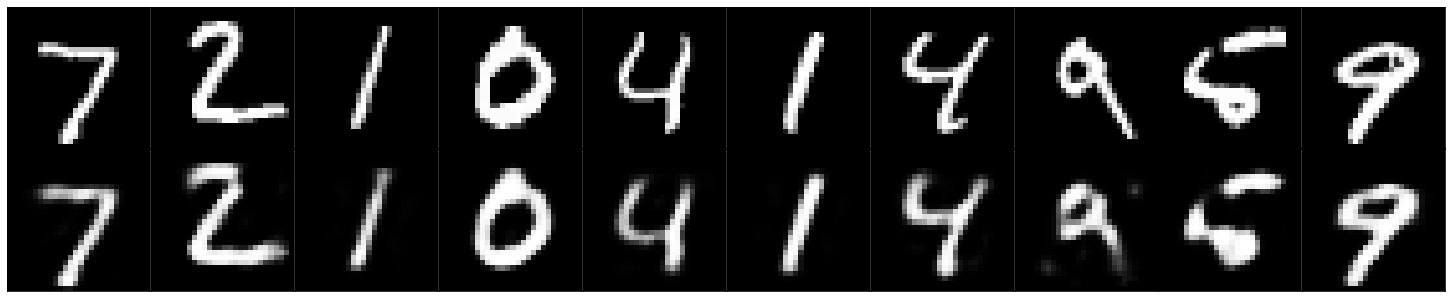

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True,sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed,  compressed = sess.run([decoded,encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs,reconstructed], axes):
    for img, ax in zip(images,row):
        ax.imshow(img.reshape((28,28)),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
fig.tight_layout(pad=0.1)

In [27]:
sess.close()

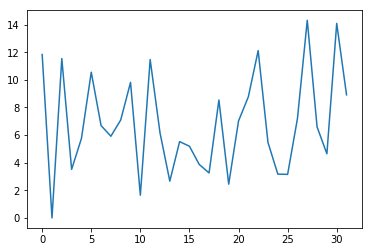

In [31]:
plt.plot(compressed[0])

<h1 style="color:#a51c25">Keras API<h1/>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [ ]:
dataset = pd.read_csv('Input Data.csv')
x = dataset.iloc[:, 3:13].values
y = dataset.iloc[:,13].values

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
labelencoder_x_1 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])
labelencoder_x_2 = LabelEncoder()
x[:, 2] = labelencoder_x_1.fit_transform(x[:, 2])

In [ ]:
onehotencoder = OneHotEncoder(categorical_features = [1])
x = onehotencoder.fit_transform(x).toarray()
x = x[:, 1:]

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [7]:
clf = Sequential()

In [ ]:
clf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11)) # First layer
clf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu')) # Second Layers
clf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # Third layer(Output layer)
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy']) # Compiling the ANN
clf.fit(x_train, y_train,batch_size=10, epochs=10) # Fitting the ANN to the training set 

In [8]:
# Making Prediction
y_pred = clf.predict(x_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

In [10]:
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed

# Tuning The ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def build_clf(optimizer):
    clf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11)) # First layer
    clf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu')) # Second Layers
    clf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # Third layer(Output layer)
    clf.compile(optimizer=optimizer, loss='binary_crossentropy', metrics =['accuracy']) # Compiling the ANN
    return clf

clf = KerasClassifier(build_fn = build_clf)

parameters = {'batch_size': [25, 32],
             'epochs': [1, 2],
             'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator=clf,
                          param_grid= parameters,
                          scoring = 'accuracy',
                          cv = 10)

grid_search = grid_search.fit(x_train,y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score-
    

In [31]:
# TensorFlow Graph visualizer code
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))


In [35]:
g = tf.Graph()
tf.summary.FileWriter("logs", g).close()

In [ ]:
show_graph(g)

# Dropout Regularization in Keras

In [2]:
# Baseline Model on the Sonar Dataset
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values

In [5]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [7]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [15]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Dropout Model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [9]:
numpy.random.seed(seed)

In [16]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16, verbose=0)))

In [17]:
pipeline = Pipeline(estimators)

In [18]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [19]:
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 82.16% (6.22%)
